In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 20)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def graphs(bdd, param, continuous=False, min_param=0, max_param=1, log=False):
    if continuous:
        if log:
            bdd[f'{param}_interval'] = pd.cut(bdd[param], np.logspace(min_param, max_param, 21))
        else:
            bdd[f'{param}_interval'] = pd.cut(bdd[param], np.linspace(min_param, max_param, 21))

    plt.figure(figsize=(16,12))

    plt.subplot(221)
    sns.scatterplot(bdd, x=param, y='best_val_auc')
    if log:
        plt.xscale('log')

    plt.subplot(223)
    if continuous:
        x = f'{param}_interval'
    else:
        x = param
    sns.barplot(bdd, x=x, y='best_val_auc')
    plt.xticks(rotation=90)

    plt.subplot(222)
    sns.scatterplot(bdd, x=param, y='best_test_auc')
    if log:
        plt.xscale('log')

    plt.subplot(224)
    sns.barplot(bdd, x=x, y='best_test_auc')
    plt.xticks(rotation=90)

    plt.show()

In [4]:
def graphs_intra(bdd, param, continuous=False, min_param=0, max_param=1, log=False):
    if continuous:
        if log:
            bdd[f'{param}_interval'] = pd.cut(bdd[param], np.logspace(min_param, max_param, 21))
        else:
            bdd[f'{param}_interval'] = pd.cut(bdd[param], np.linspace(min_param, max_param, 21))
    plt.figure(figsize=(24,12))

    plt.subplot(231)
    sns.scatterplot(bdd, x=param, y='best_val_auc')
    if log:
        plt.xscale('log')

    plt.subplot(234)
    if continuous:
        x = f'{param}_interval'
    else:
        x = param
    sns.barplot(bdd, x=x, y='best_val_auc')
    plt.xticks(rotation=90)


    plt.subplot(232)
    sns.scatterplot(bdd, x=param, y='best_test_intra_auc')
    if log:
        plt.xscale('log')

    plt.subplot(235)
    sns.barplot(bdd, x=x, y='best_test_intra_auc')
    plt.xticks(rotation=90)


    plt.subplot(233)
    sns.scatterplot(bdd, x=param, y='best_test_auc')
    if log:
        plt.xscale('log')

    plt.subplot(236)
    sns.barplot(bdd, x=x, y='best_test_auc')
    plt.xticks(rotation=90)

    plt.show()

# PCS asymetry (incomplete grid search)

In [21]:
bdd_asymetry = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/grid_search_0/bdd_ACC_asymetry.csv", index_col=0)
bdd_asymetry = bdd_asymetry.sort_values(by='best_val_auc', ascending=False)
bdd_asymetry[:20]

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,backbone_output_size,converter_activation,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss
38,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.587122,0.368132,0.527679,0.564321,0.769231,0.583036,6,linear,0.101641,27,0.005235,4,relu,0.034942,1.381315
48,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.597312,0.346154,0.536607,0.448258,0.763736,0.446875,25,sigmoid,0.003547,18,0.009063,2,sigmoid,0.098650,1.381988
45,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.647660,0.445055,0.535714,0.663923,0.747253,0.533036,7,linear,0.124574,14,0.000900,6,relu,0.033183,1.366361
55,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.725788,0.445055,0.552679,0.671092,0.741758,0.550000,32,linear,0.054651,27,0.002312,6,linear,0.474892,1.309247
19,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.621507,0.401099,0.580357,0.382078,0.730769,0.377679,13,linear,0.170533,25,0.007907,5,relu,0.014232,1.379737
34,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.618818,0.395604,0.557143,0.538201,0.725275,0.555804,12,sigmoid,0.044510,18,0.002521,3,relu,0.097224,1.376534
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.583870,0.409341,0.547768,0.512612,0.725275,0.434821,17,linear,0.018068,21,0.008230,3,sigmoid,0.053203,1.385013
40,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.601925,0.387363,0.570089,0.605377,0.725275,0.544643,7,linear,0.079906,11,0.004812,3,sigmoid,0.068738,1.378492
52,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.623365,0.390110,0.559821,0.491636,0.714286,0.500000,20,relu,0.167950,6,0.004121,6,sigmoid,0.237346,1.379801
23,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.704879,0.560440,0.596429,0.606173,0.708791,0.500000,15,linear,0.036648,21,0.003842,4,linear,0.305876,1.343533


In [5]:
bdd_asymetry = bdd_asymetry.sort_values(by='best_test_auc', ascending=False)
bdd_asymetry[:20]

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,backbone_output_size,converter_activation,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss
7,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.671623,0.521978,0.633929,0.665848,0.692308,0.685714,14,linear,0.054877,21,0.006404,4,linear,0.212866,1.378679
32,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.499967,0.560440,0.396429,0.558214,0.642857,0.649107,5,linear,0.100800,29,0.002299,0,relu,0.020888,1.382980
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.729937,0.510989,0.544643,0.741819,0.626374,0.604018,21,relu,0.181952,12,0.000495,0,linear,0.181714,1.363711
47,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.552705,0.296703,0.527679,0.525456,0.653846,0.593750,8,linear,0.084462,6,0.002177,2,sigmoid,0.293169,1.371022
56,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.606704,0.423077,0.566964,0.468968,0.587912,0.583036,15,relu,0.138885,30,0.006831,4,linear,0.355646,1.381356
38,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.587122,0.368132,0.527679,0.564321,0.769231,0.583036,6,linear,0.101641,27,0.005235,4,relu,0.034942,1.381315
36,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.624361,0.406593,0.585714,0.553004,0.708791,0.581250,9,linear,0.052751,31,0.008713,3,linear,0.379796,1.378052
16,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.456920,0.609890,0.577679,0.470063,0.607143,0.576339,29,sigmoid,0.072057,10,0.009419,1,sigmoid,0.371465,1.383948
28,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.687654,0.516484,0.503571,0.597013,0.700549,0.570089,30,sigmoid,0.099786,27,0.000355,4,relu,0.309614,1.385988
21,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.395420,0.510989,0.393750,0.450481,0.703297,0.569643,21,linear,0.099753,20,0.002024,0,sigmoid,0.455144,1.382160


## Supervised parameters

### drop rate

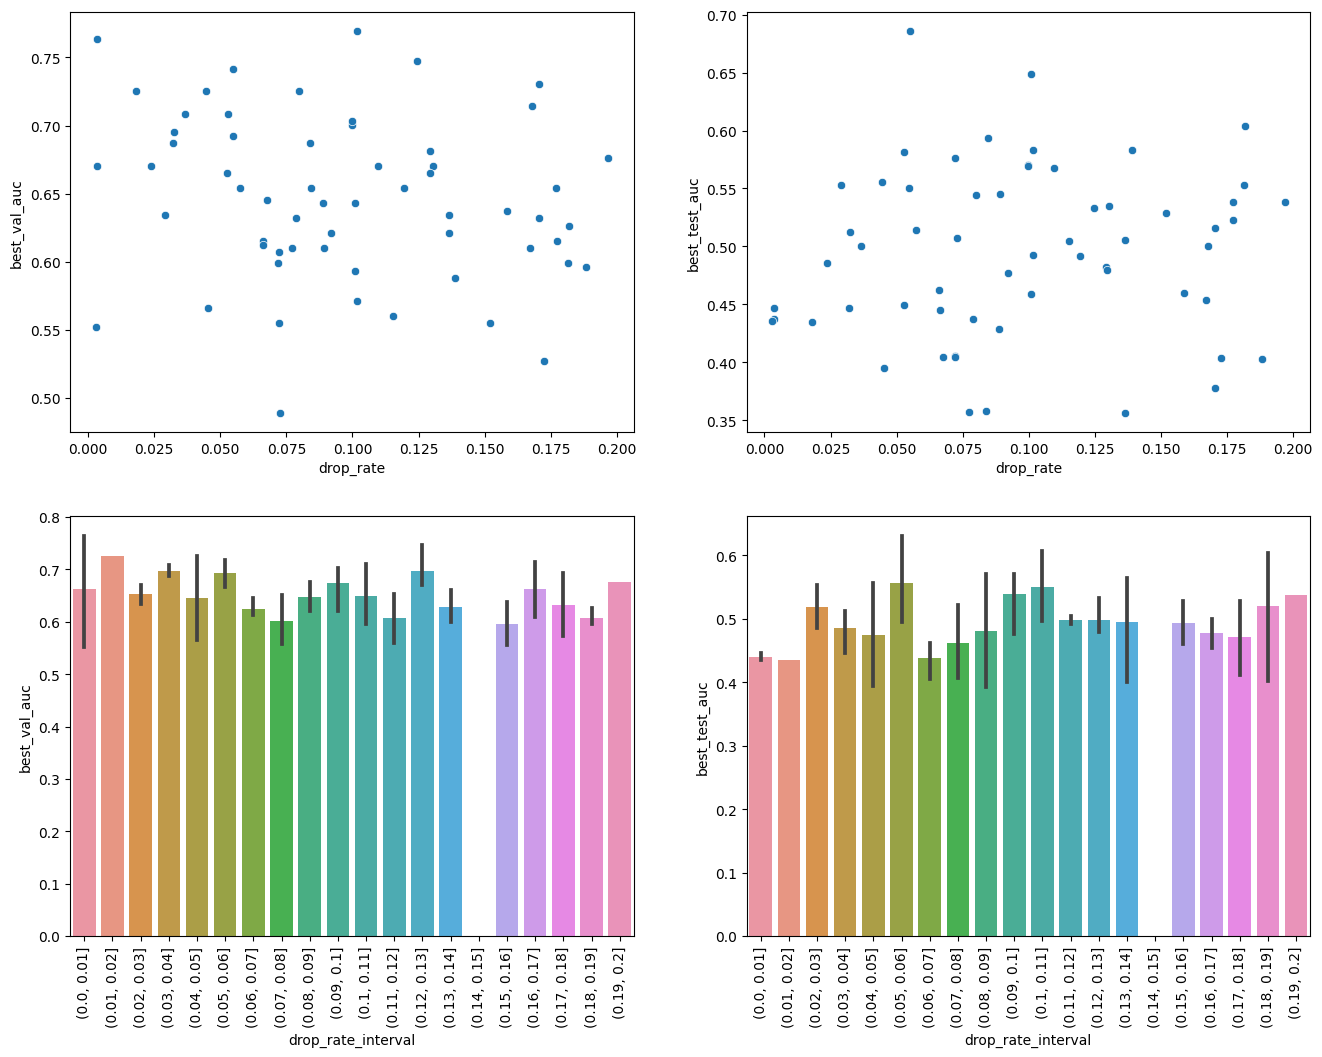

In [9]:
graphs(bdd_asymetry, 'drop_rate', continuous=True,
       min_param=0, max_param=0.2)

### sigma noise

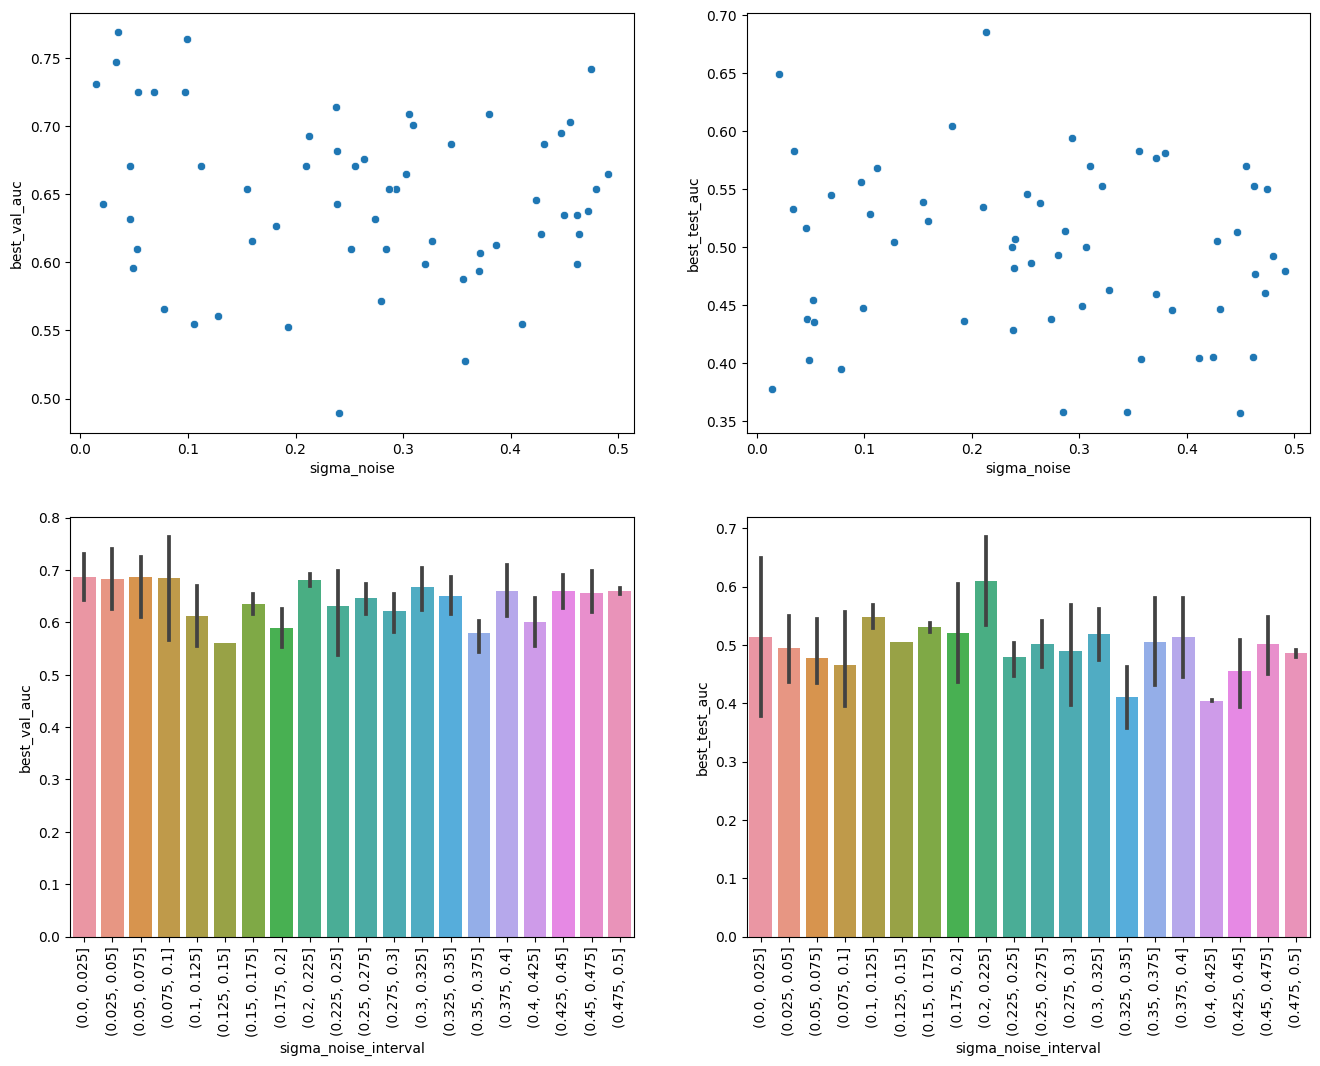

In [10]:
graphs(bdd_asymetry, 'sigma_noise', continuous=True,
       min_param=0, max_param=0.5)

### lr

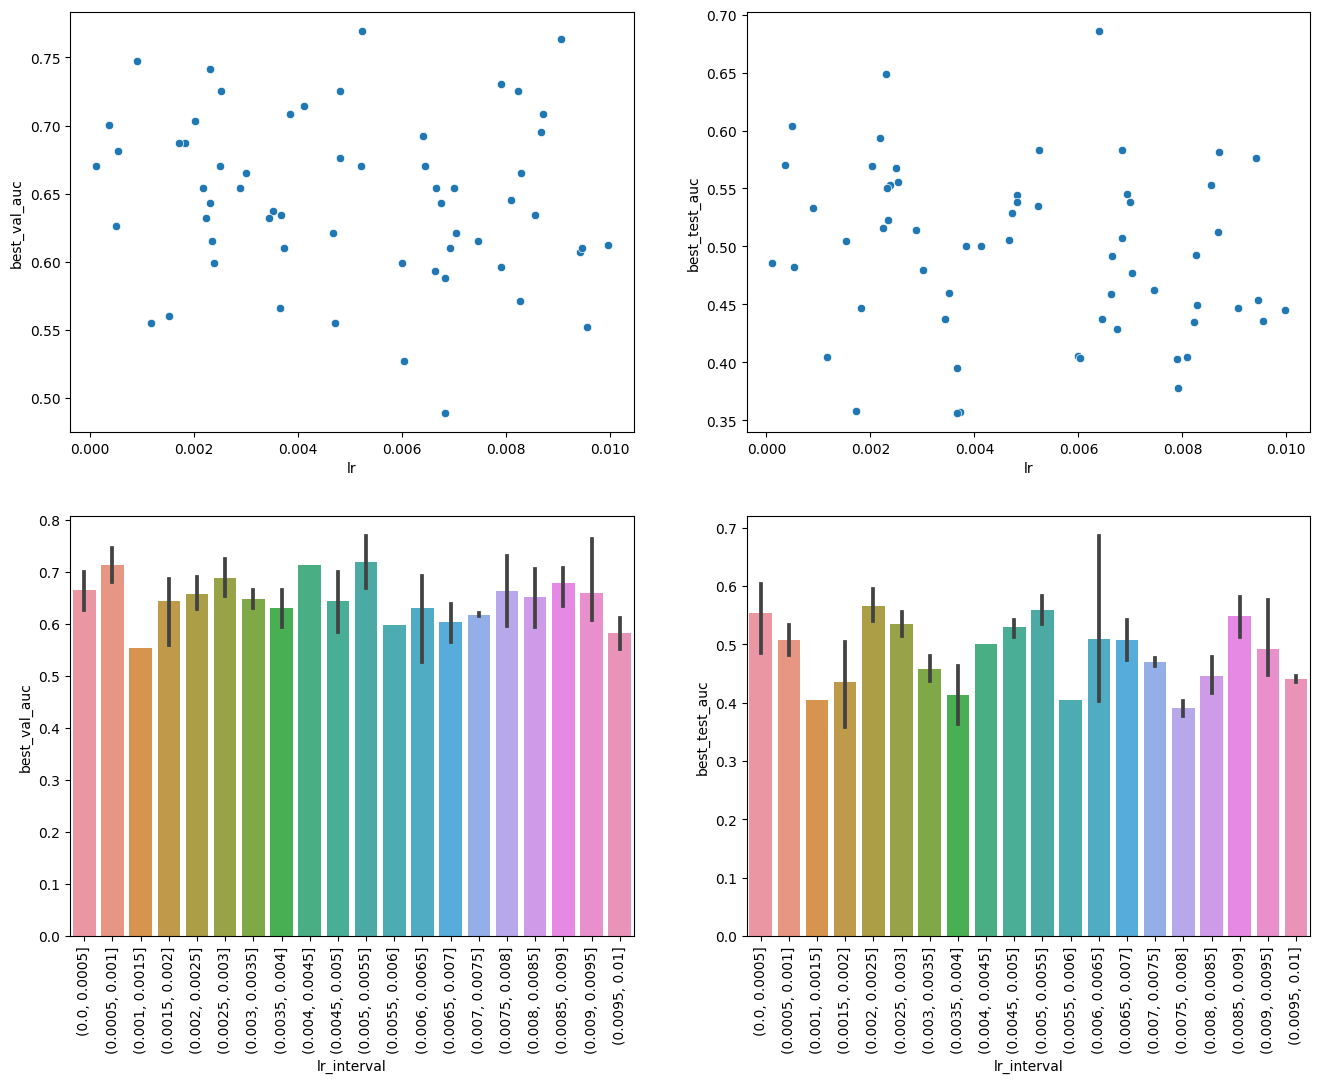

In [12]:
graphs(bdd_asymetry, 'lr', continuous=True,
       min_param=0, max_param=0.01)

### Max angle

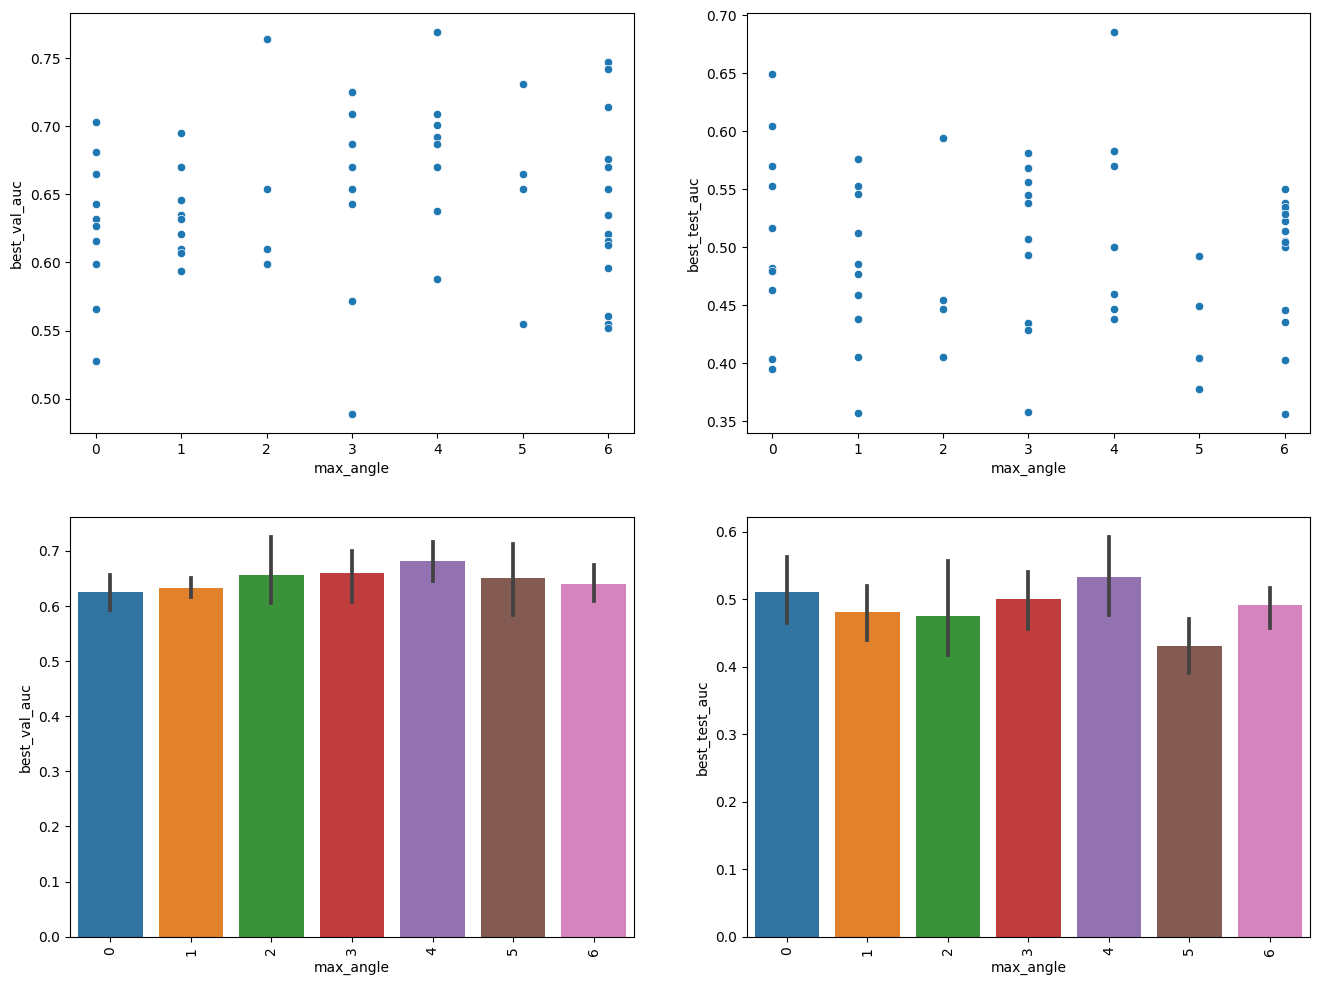

In [26]:
graphs(bdd_asymetry, 'max_angle', continuous=False,
       min_param=0, max_param=0.01)

## Structure parameters

### Projection head activation

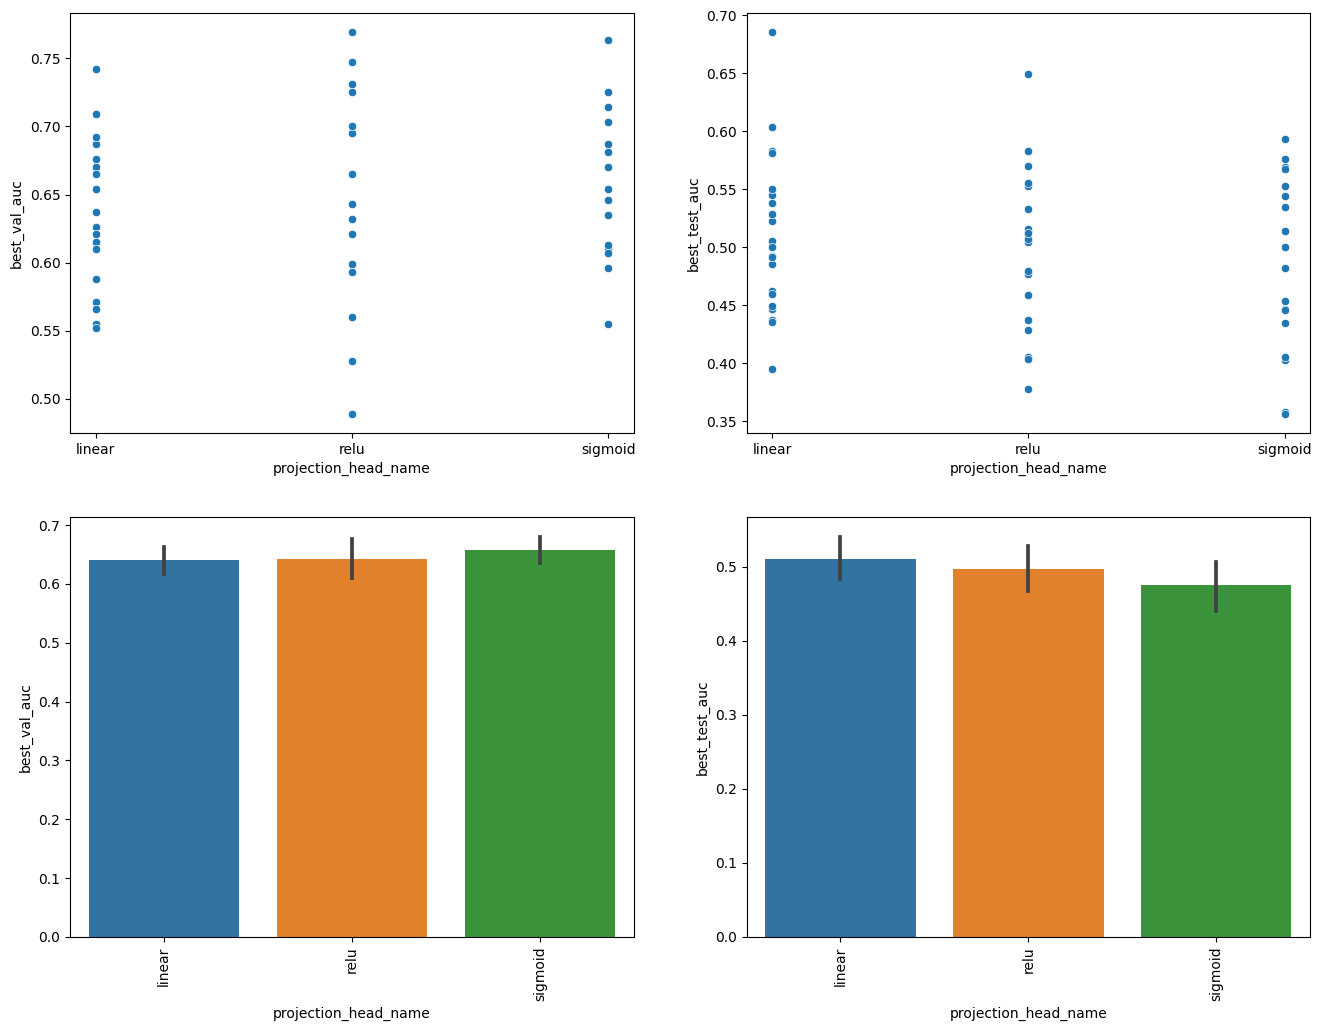

In [35]:
bdd_asymetry = bdd_asymetry.sort_values(['projection_head_name'])
graphs(bdd_asymetry, 'projection_head_name', continuous=False,
       min_param=0, max_param=0.5)

### Converter activation

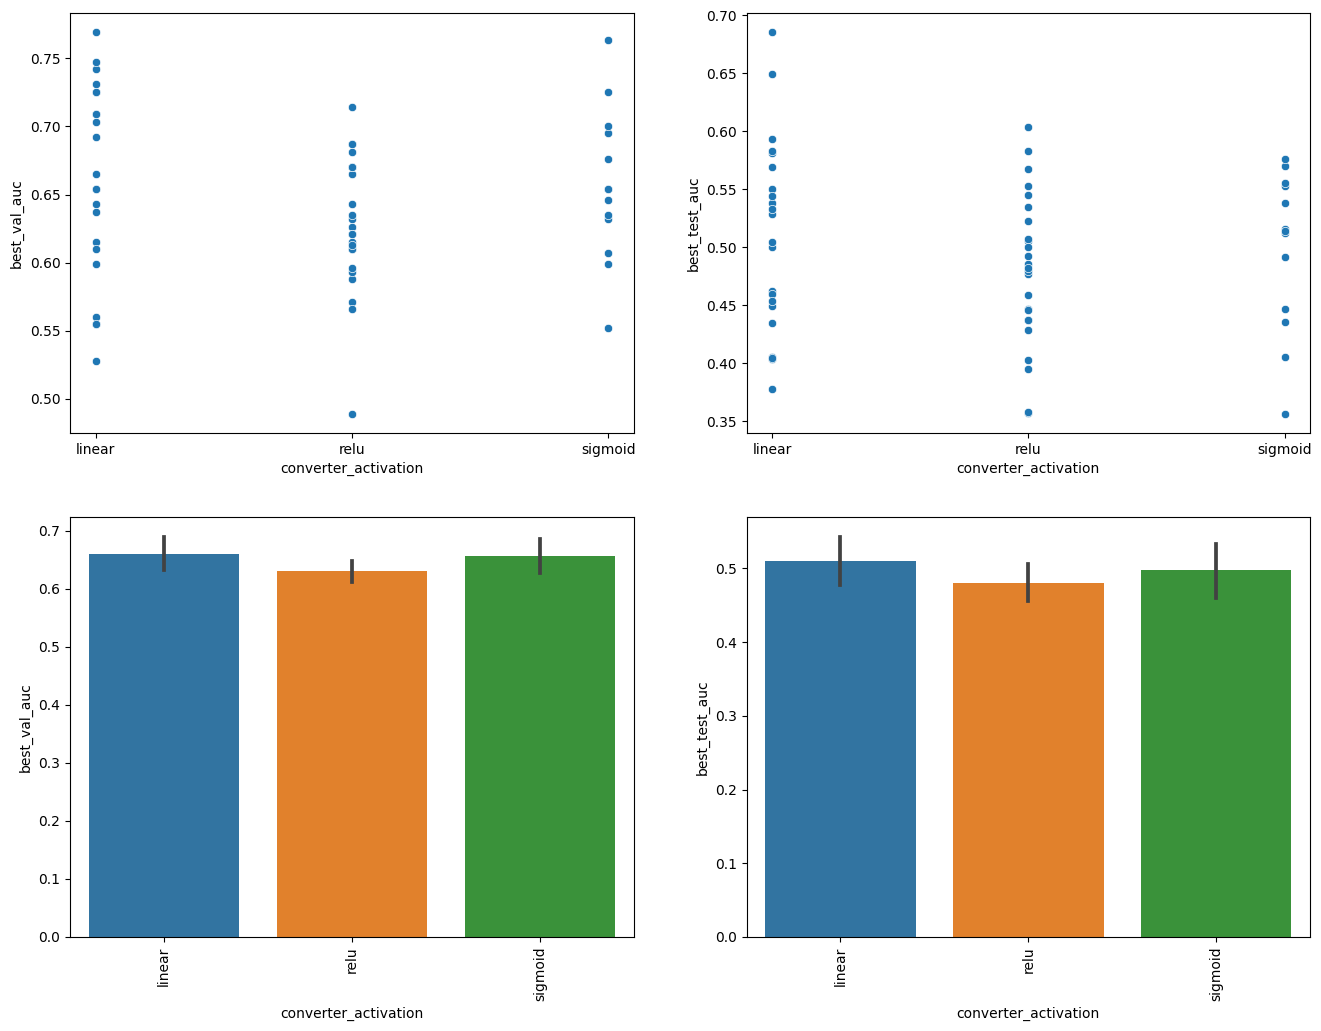

<Axes: xlabel='converter_activation', ylabel='best_test_auc'>

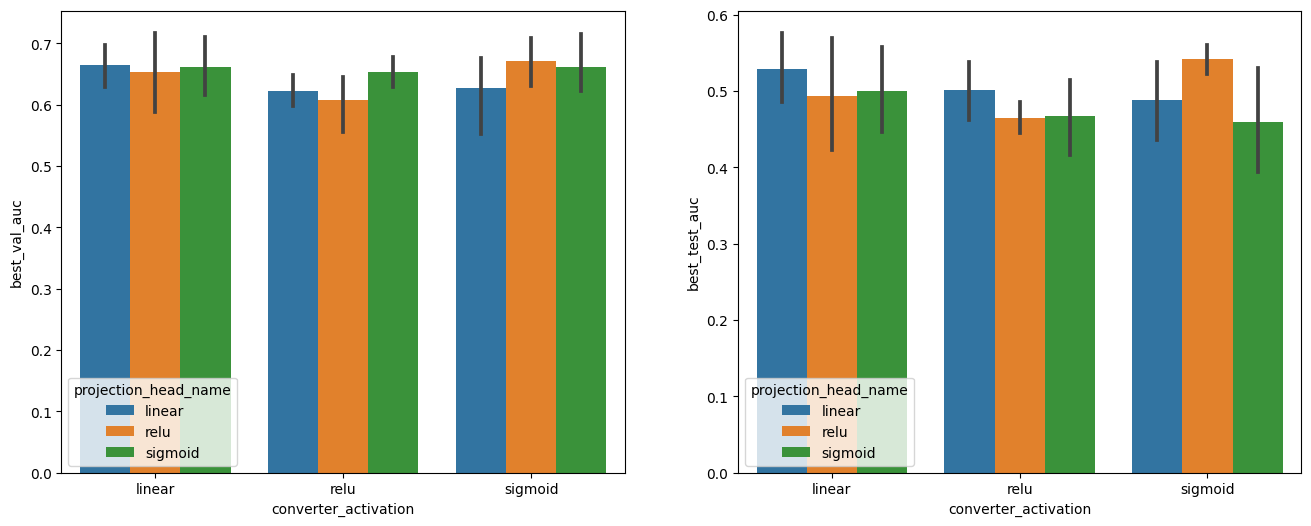

In [36]:
bdd_asymetry = bdd_asymetry.sort_values(['converter_activation', 'projection_head_name'])

graphs(bdd_asymetry, 'converter_activation', continuous=False,
       min_param=0, max_param=0.5)


plt.figure(figsize=(16,6))
plt.subplot(121)
sns.barplot(bdd_asymetry, x='converter_activation', y='best_val_auc', hue='projection_head_name')

plt.subplot(122)
sns.barplot(bdd_asymetry, x='converter_activation', y='best_test_auc', hue='projection_head_name')

### Latent space size

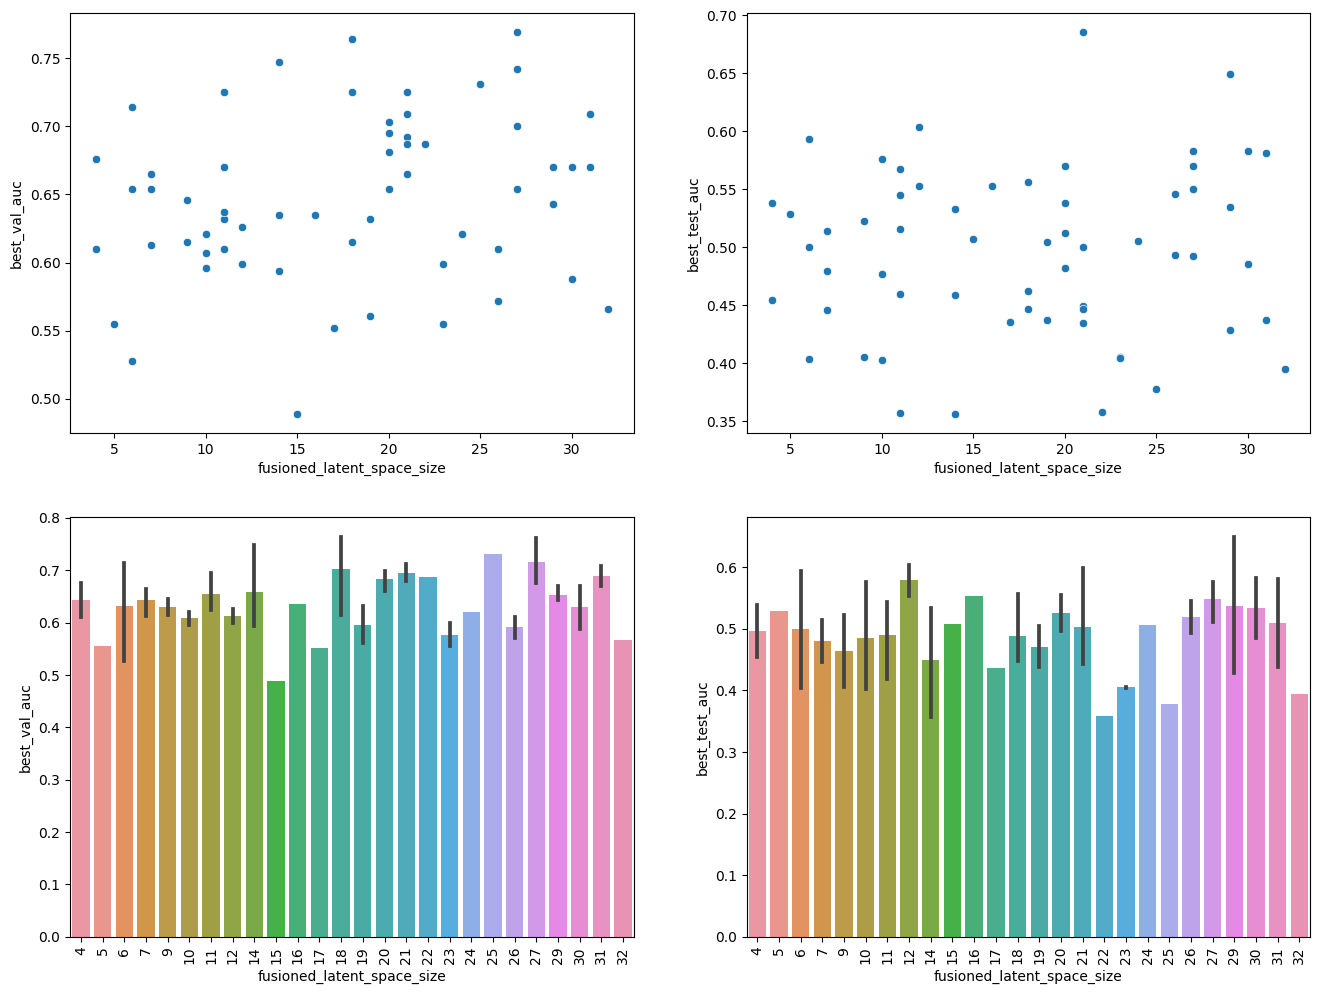

In [16]:
graphs(bdd_asymetry, 'fusioned_latent_space_size', continuous=False,
       min_param=0, max_param=0.5)

### Encoder output size

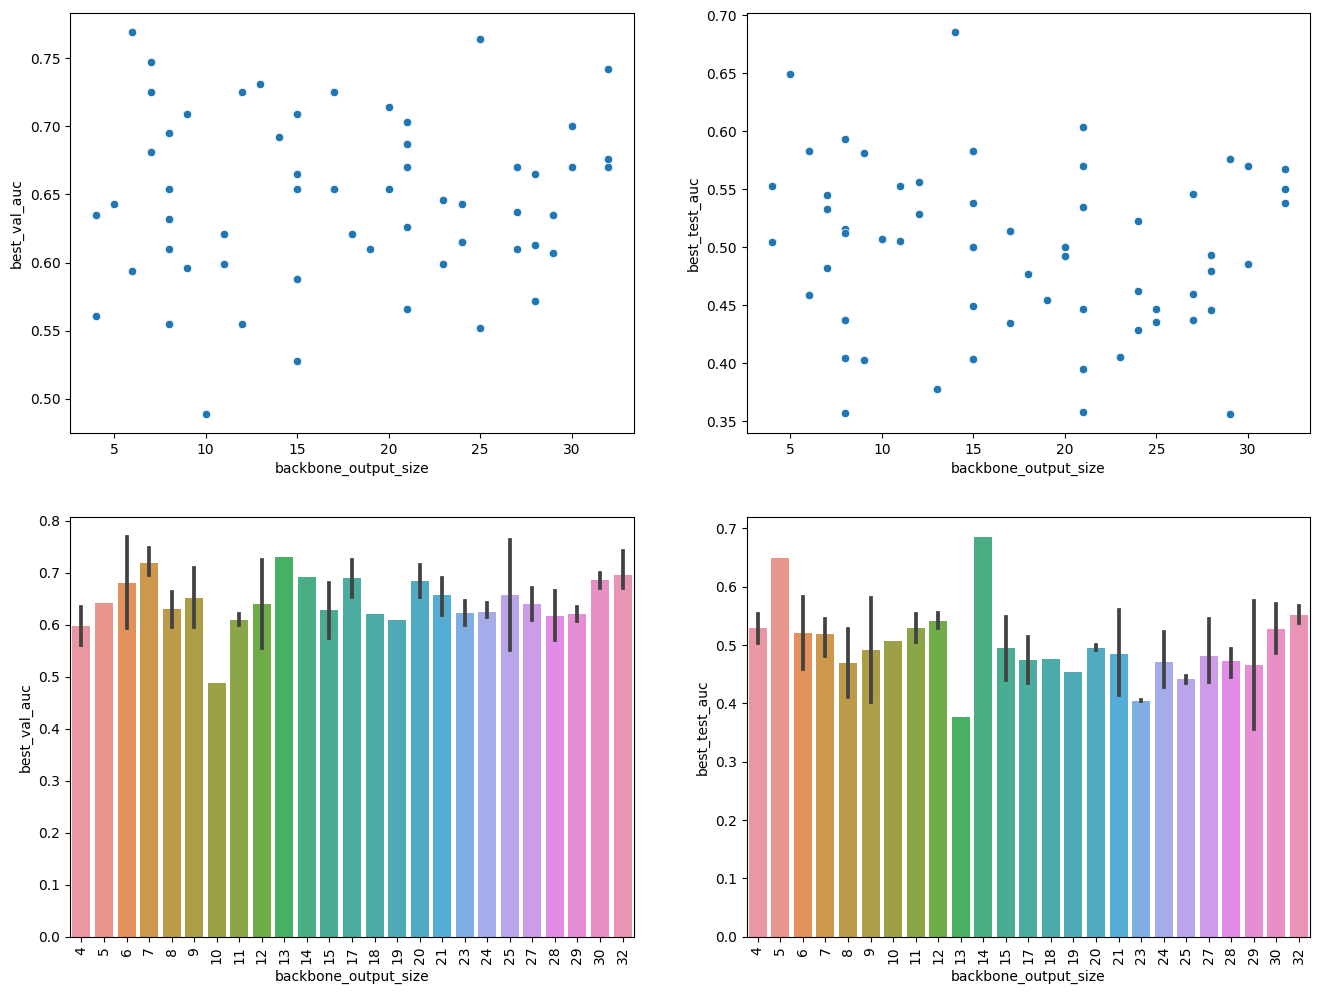

In [17]:
graphs(bdd_asymetry, 'backbone_output_size', continuous=False,
       min_param=0, max_param=0.5)

# True PCS asymetry grid search

In [45]:
bdd_asymetry_2 = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/grid_search_ACC_asymetry/bdd_ACC_asymetry.csv", index_col=0)
bdd_asymetry_2 = bdd_asymetry_2.sort_values(by='best_test_auc', ascending=False)
bdd_asymetry_2.loc[bdd_asymetry_2.fusioned_latent_space_size == -1, 'converter_activation'] = 'None'
bdd_asymetry_2[:20]

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,backbone_output_size,converter_activation,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss
55,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.427415,0.552198,0.516518,0.490840,0.631868,0.642857,32,sigmoid,0.121993,10,0.007787,4,sigmoid,0.155977,1.382976
30,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.621905,0.500000,0.545536,0.595188,0.576923,0.621429,32,relu,0.164186,10,0.001588,5,sigmoid,0.090636,1.382362
104,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.559144,0.604396,0.616071,32,None,0.093346,-1,0.009456,4,sigmoid,0.166811,1.383128
14,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.417922,0.510989,0.541071,0.544076,0.697802,0.600446,32,linear,0.158480,10,0.005212,3,sigmoid,0.077259,1.386484
43,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.608596,0.450549,0.563393,0.489147,0.571429,0.596429,32,None,0.159268,-1,0.002332,6,sigmoid,0.246319,1.383916
100,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.621640,0.406593,0.574107,0.533322,0.631868,0.591964,32,sigmoid,0.124792,32,0.001698,2,sigmoid,0.184186,1.378527
21,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.596349,0.384615,0.580357,0.553933,0.840659,0.590179,32,None,0.103402,-1,0.003820,6,sigmoid,0.453541,1.383730
81,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.587720,0.461538,0.583036,0.515765,0.598901,0.589286,32,sigmoid,0.157120,10,0.001872,4,sigmoid,0.076643,1.377136
28,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.616263,0.494505,0.573214,0.448291,0.708791,0.588393,32,None,0.105552,-1,0.006751,5,sigmoid,0.266087,1.386663
71,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.475274,0.483516,0.418750,0.601328,0.640110,0.587054,32,None,0.128706,-1,0.006427,5,sigmoid,0.074562,1.396636


## Supervised parameters

### Drop rate

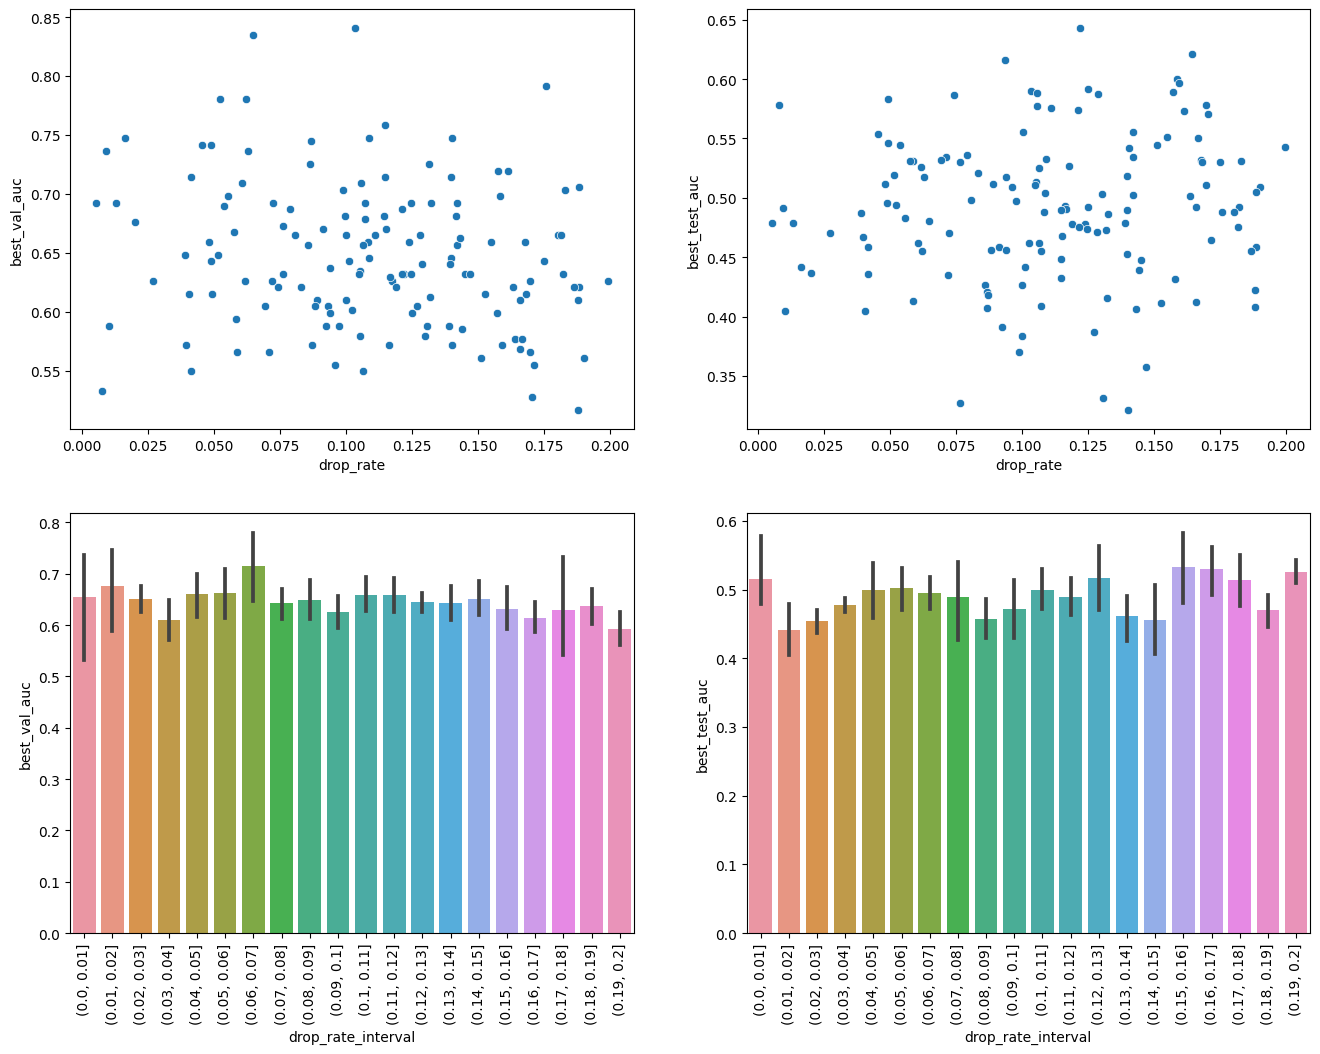

In [46]:
graphs(bdd_asymetry_2, 'drop_rate', continuous=True,
       min_param=0, max_param=0.2)

### Sigma noise

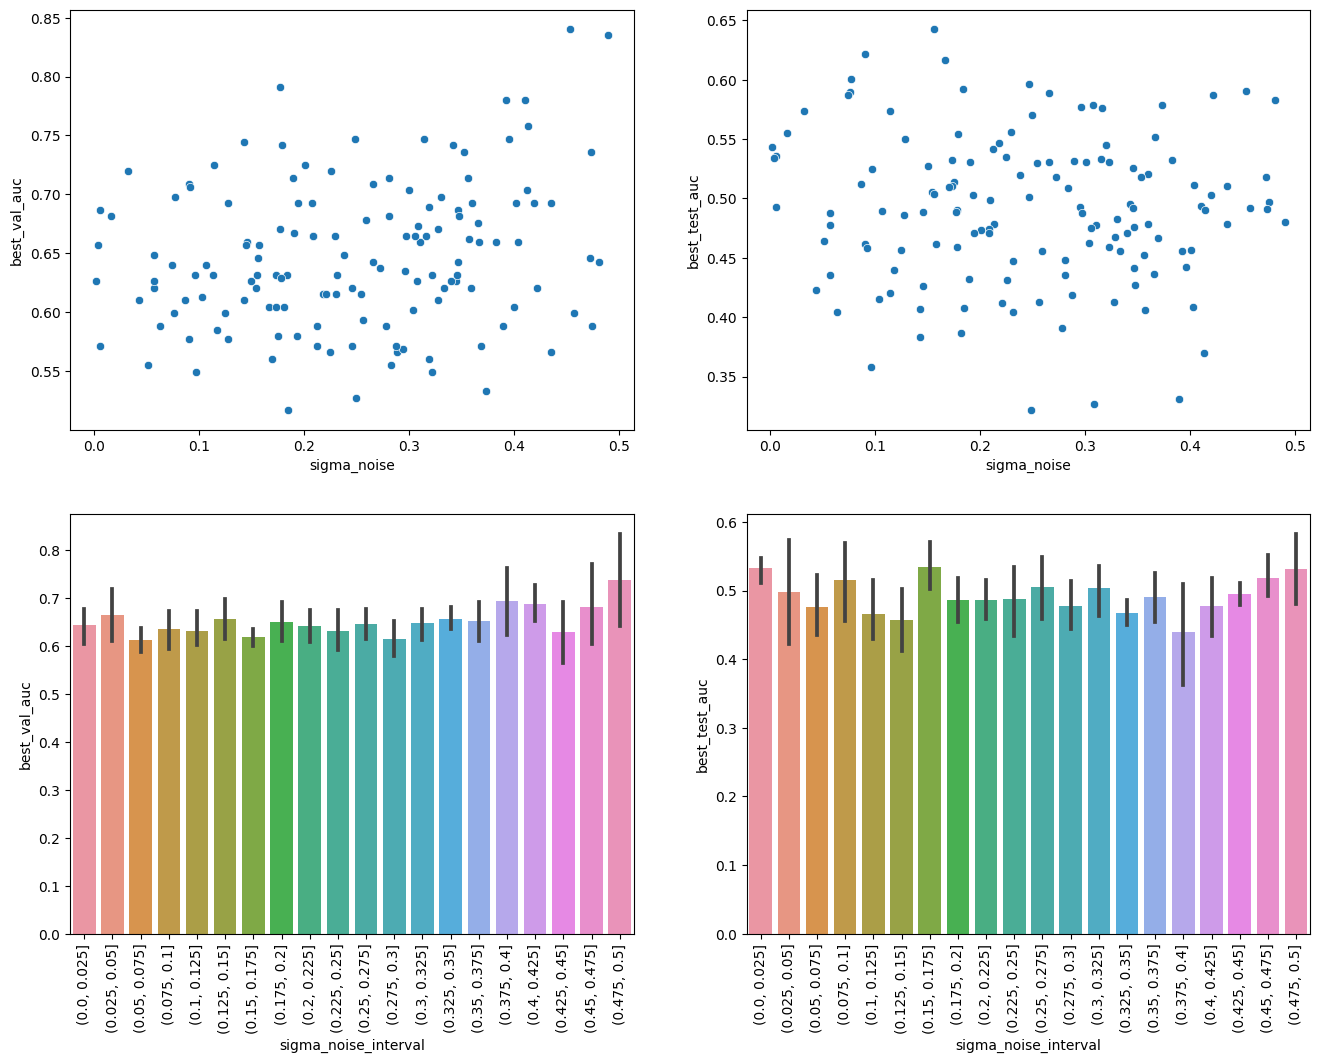

In [47]:
graphs(bdd_asymetry_2, 'sigma_noise', continuous=True,
       min_param=0, max_param=0.5)

### Learning rate

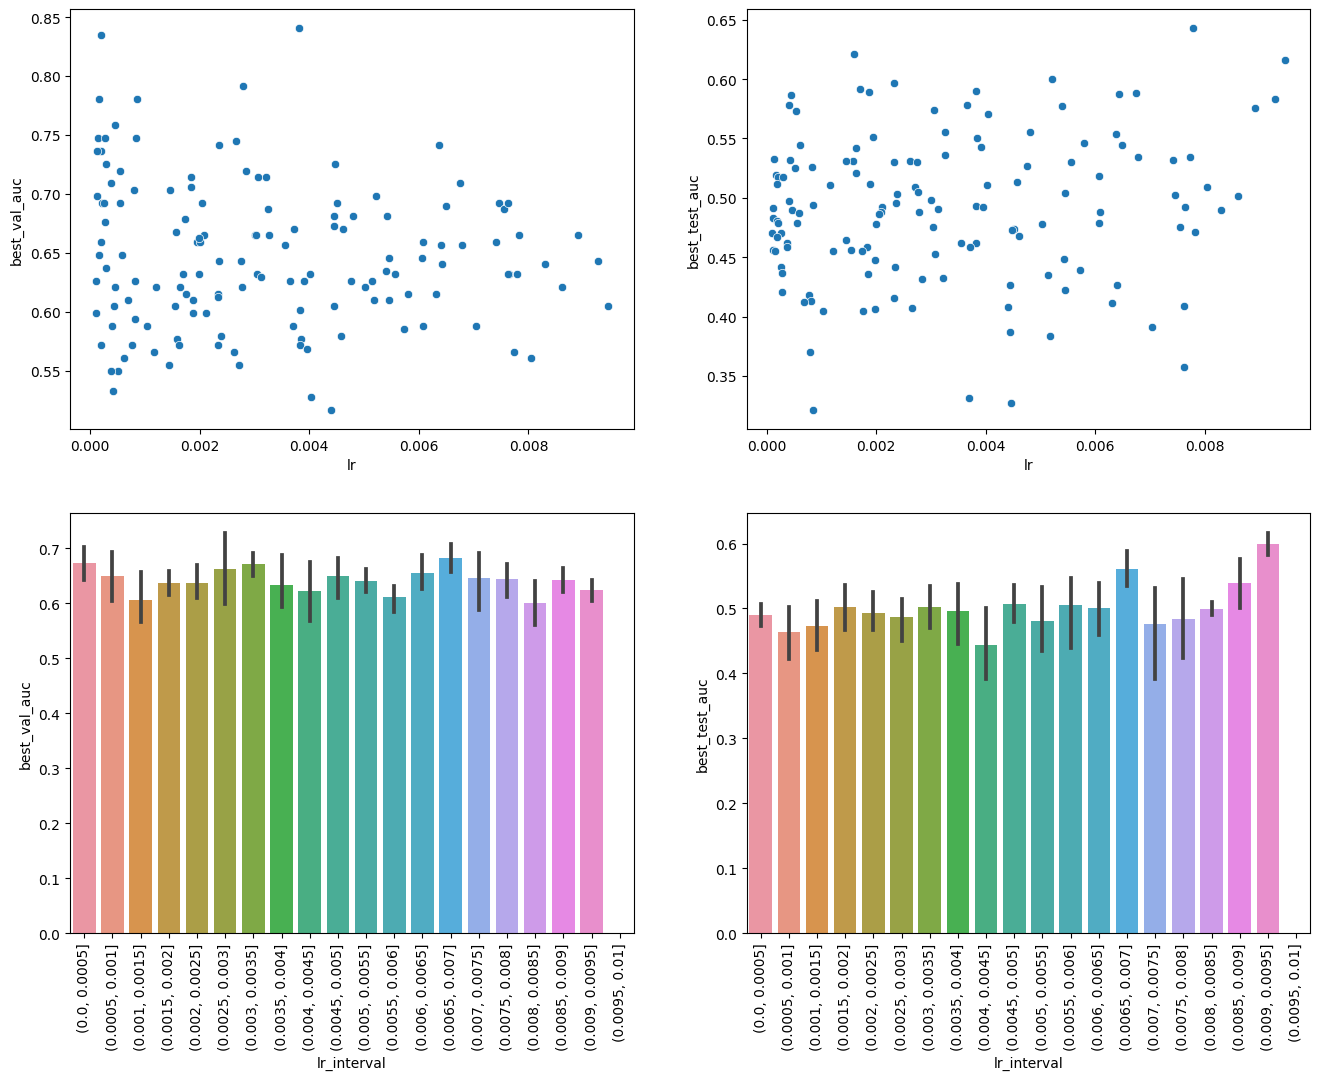

In [48]:
graphs(bdd_asymetry_2, 'lr', continuous=True,
       min_param=0, max_param=0.01)

### Max angle

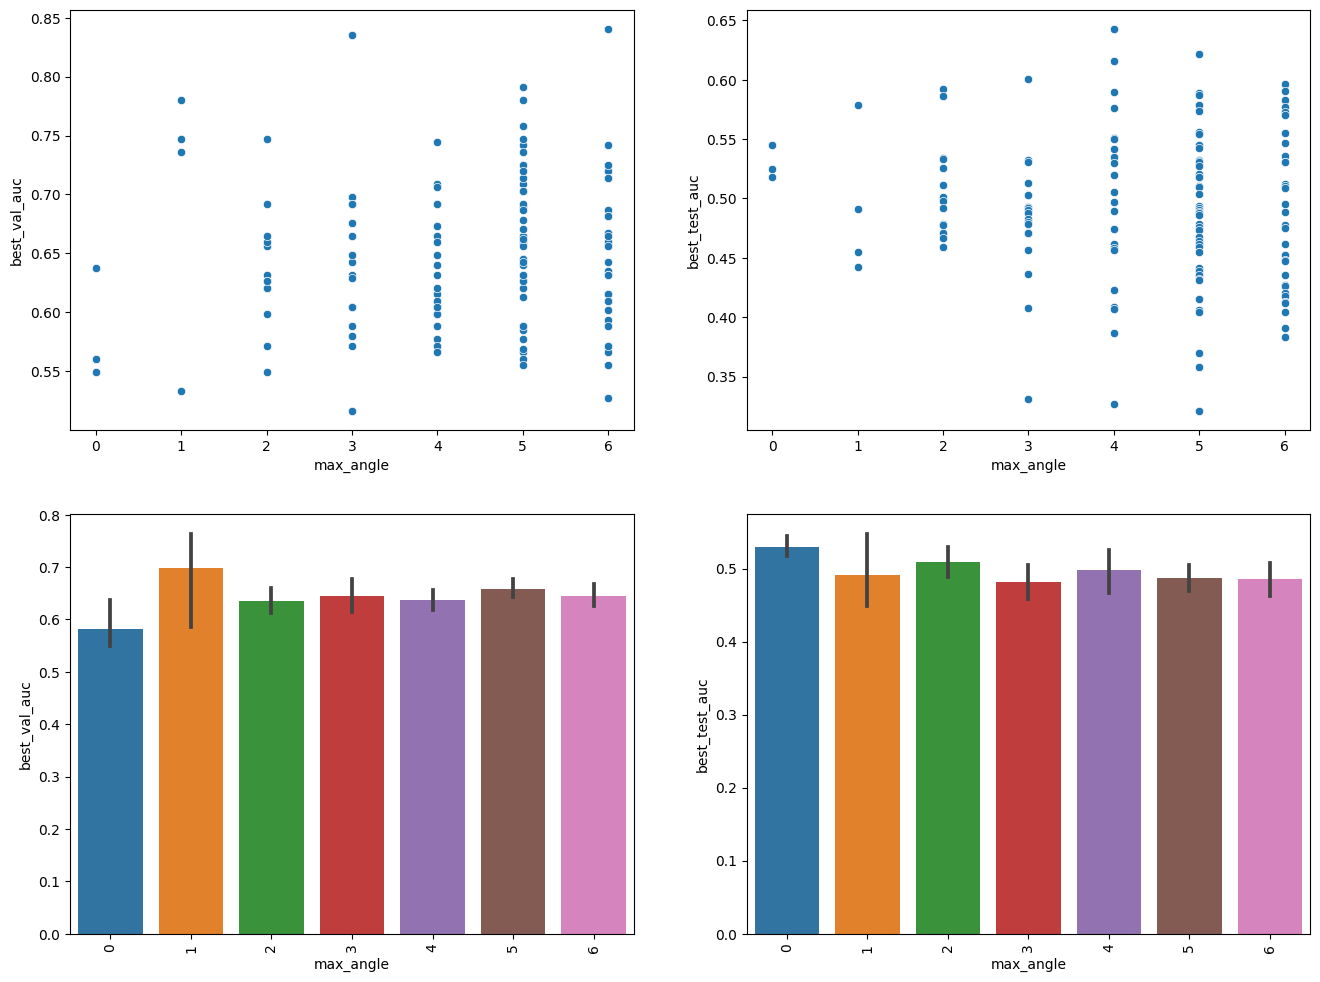

In [27]:
graphs(bdd_asymetry_2, 'max_angle', continuous=False,
       min_param=0, max_param=0.01)

## Structure parameters

### Projection head activation

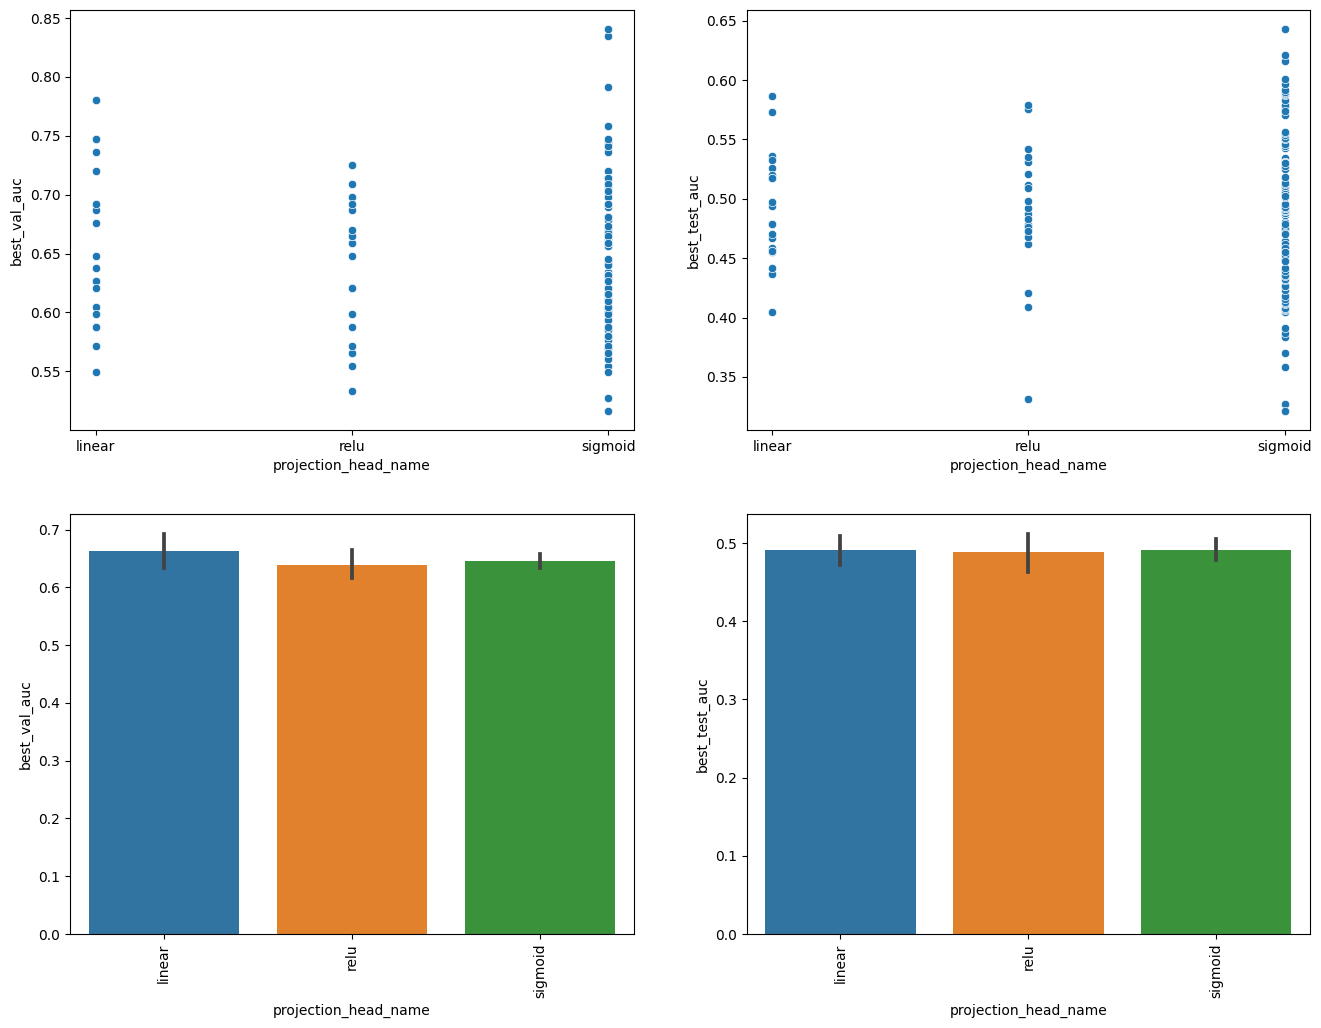

In [43]:
bdd_asymetry_2 = bdd_asymetry_2.sort_values(['projection_head_name'])
graphs(bdd_asymetry_2, 'projection_head_name', continuous=False,
       min_param=0, max_param=0.2)

### Converter activation

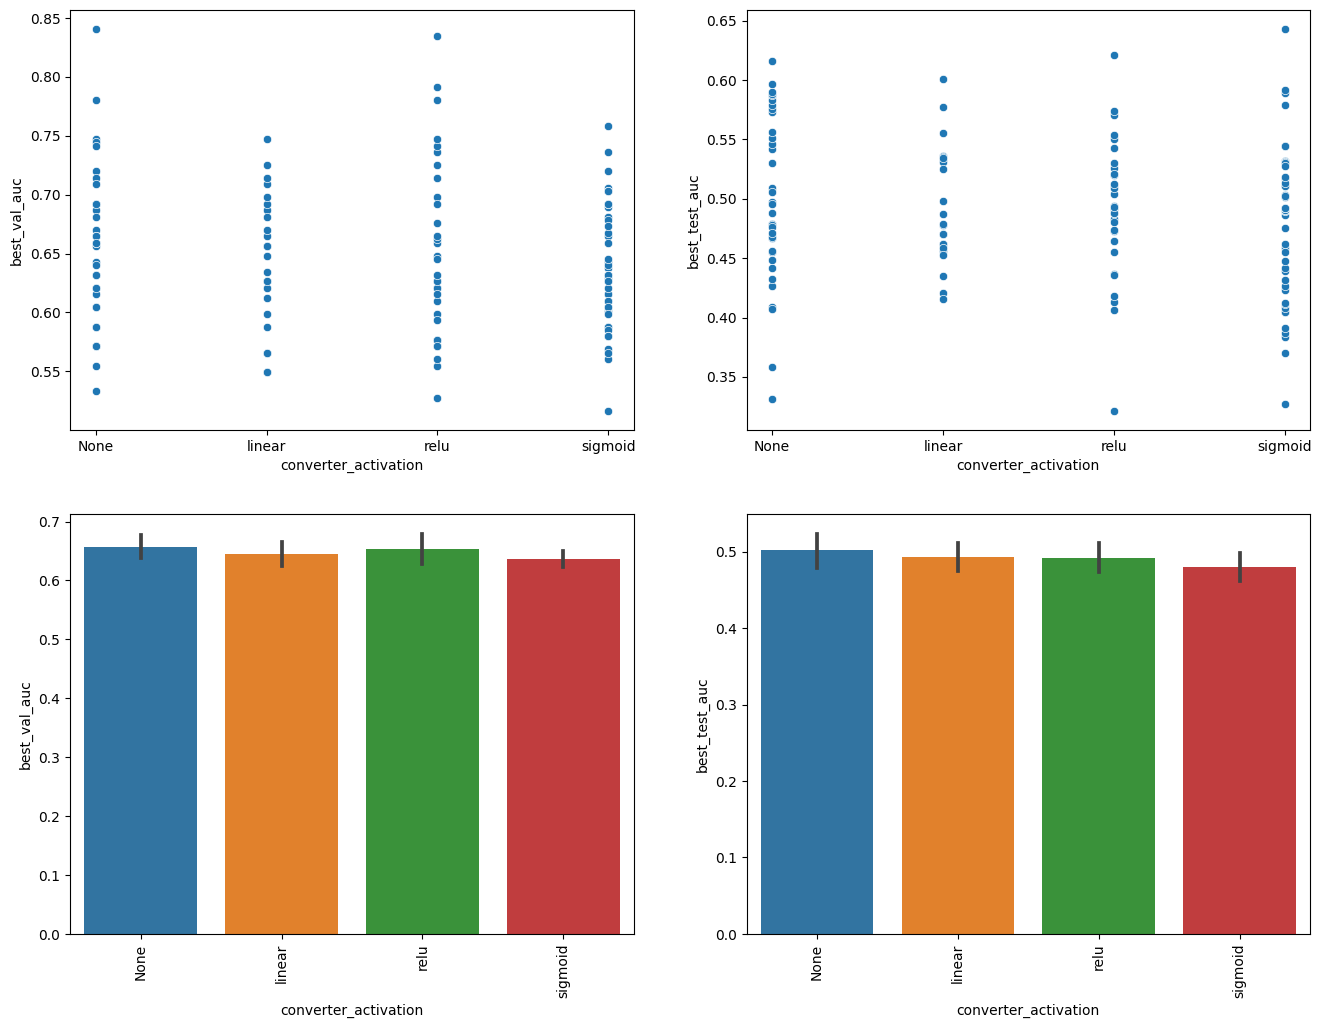

<Axes: xlabel='converter_activation', ylabel='best_test_auc'>

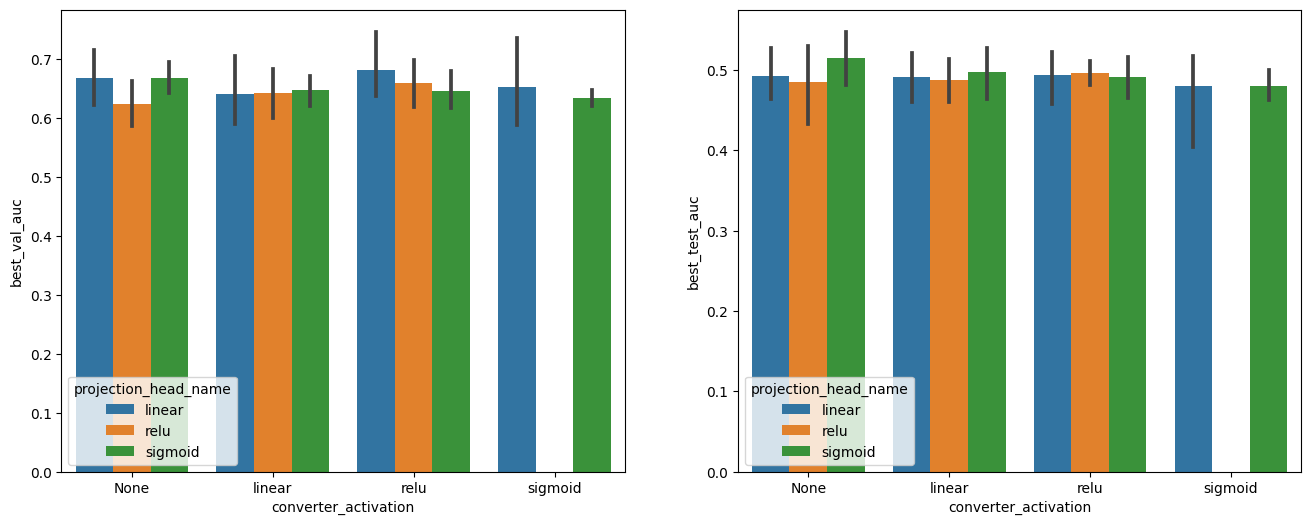

In [44]:
bdd_asymetry_2 = bdd_asymetry_2.sort_values(['converter_activation', 'projection_head_name'])
graphs(bdd_asymetry_2, 'converter_activation', continuous=False,
       min_param=0, max_param=0.2)

plt.figure(figsize=(16,6))
plt.subplot(121)
sns.barplot(bdd_asymetry_2, x='converter_activation', y='best_val_auc', hue='projection_head_name')

plt.subplot(122)
sns.barplot(bdd_asymetry_2, x='converter_activation', y='best_test_auc', hue='projection_head_name')

### Backbone output size

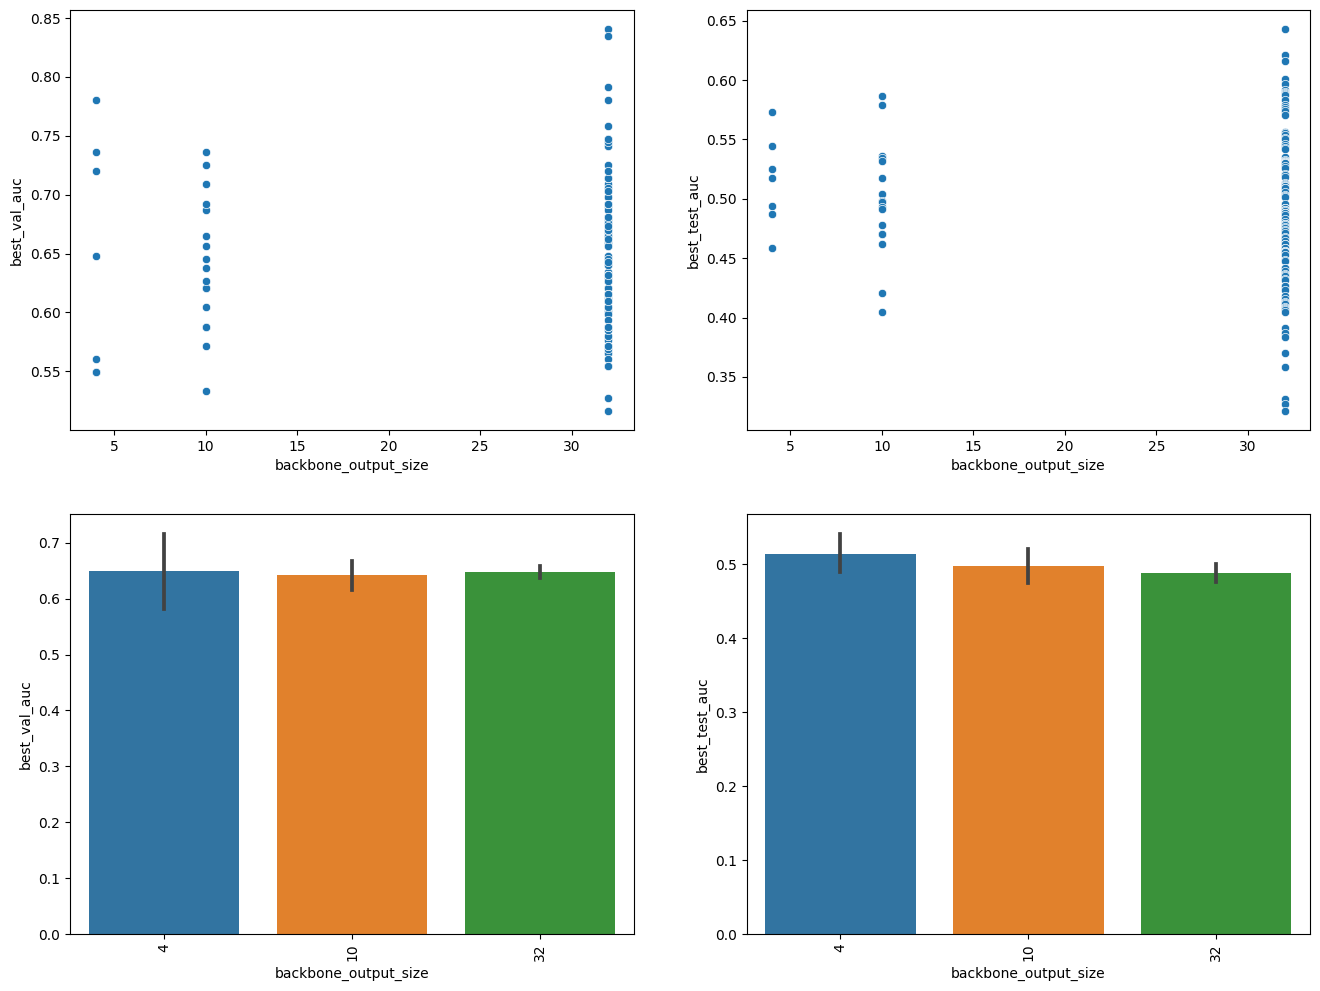

In [49]:
graphs(bdd_asymetry_2, 'backbone_output_size', continuous=False,
       min_param=0, max_param=0.2)

### Fusioned latent space size

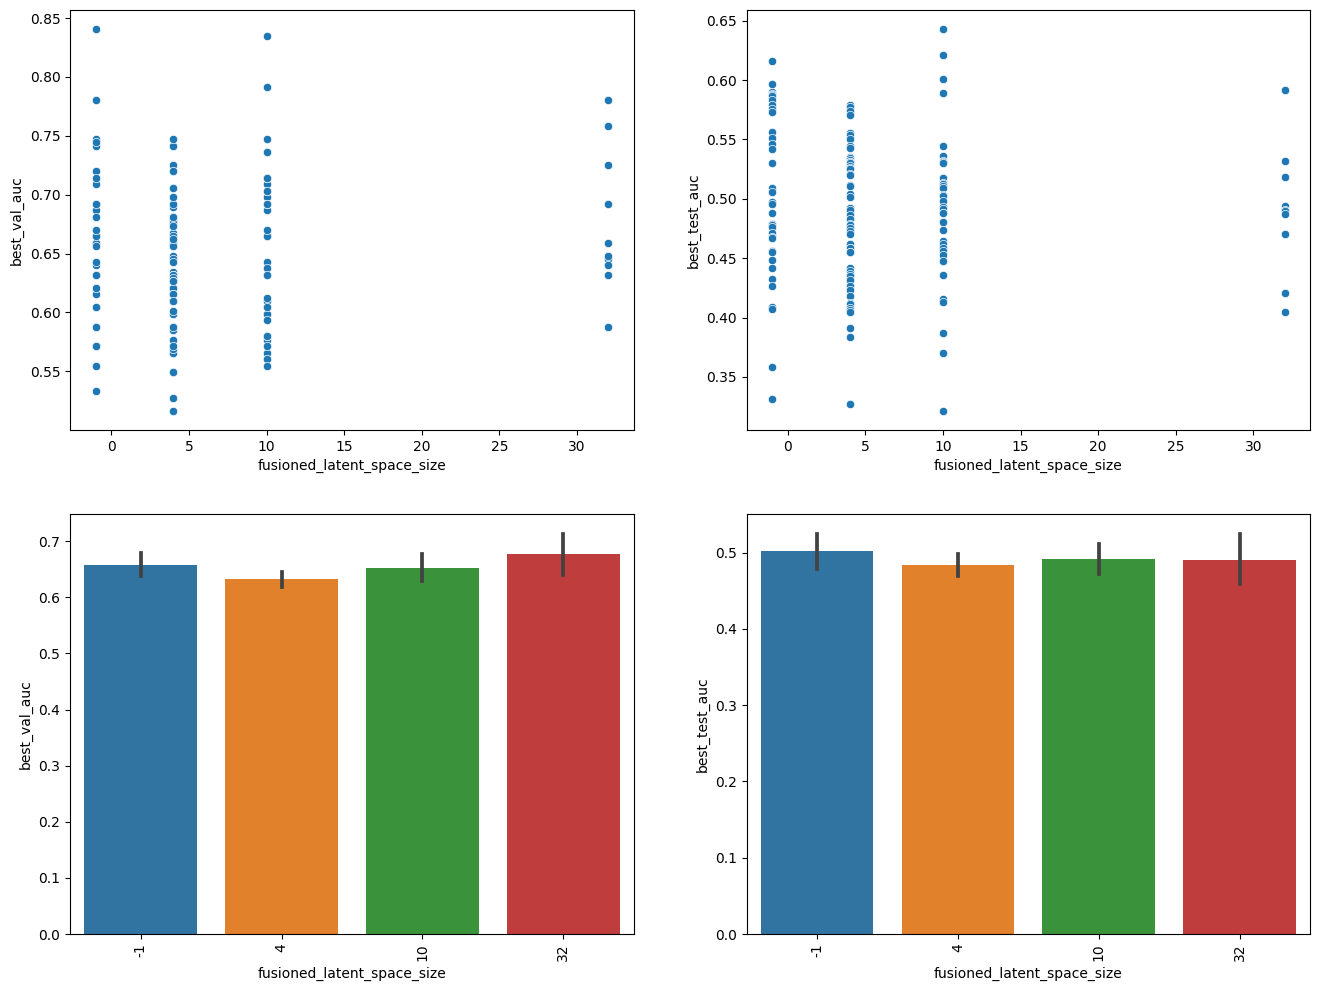

In [50]:
graphs(bdd_asymetry_2, 'fusioned_latent_space_size', continuous=False,
       min_param=0, max_param=0.2)

# Cing schiz

In [78]:
bdd_schiz = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/gs_cing_schiz/bdd_cing_schiz.csv", index_col=0)
bdd_schiz = bdd_schiz.sort_values(by='best_test_auc', ascending=False)
bdd_schiz.loc[bdd_schiz.fusioned_latent_space_size == -1, 'converter_activation'] = 'None'
bdd_schiz[:20]

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,converter_activation,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss
62,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.589578,0.517048,0.626321,0.564347,32,sigmoid,0.118947,32,0.033255,5,relu,0.079131,1.342983
64,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.499093,0.500000,0.500000,0.500000,0.592968,0.594595,0.624962,0.611453,10,sigmoid,0.127293,10,0.050001,3,relu,0.177161,1.338679
121,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.651688,0.553846,0.542887,0.620382,0.599758,0.646985,0.619903,0.599138,32,linear,0.120716,10,0.004673,3,relu,0.241553,1.324623
122,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.605624,0.619543,0.610541,0.614532,0.602426,0.608732,0.616883,0.603448,32,relu,0.148264,4,0.000465,5,sigmoid,0.167260,1.336136
110,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.550975,0.556341,0.551722,0.550493,0.596500,0.604990,0.615071,0.596983,32,linear,0.143790,10,0.016832,2,relu,0.230088,1.348551
136,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.540401,0.562994,0.613259,0.528787,0.600470,0.609563,0.614844,0.616071,32,relu,0.103074,10,0.012070,4,sigmoid,0.197504,1.353640
14,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.416094,0.413514,0.459604,0.406404,0.592043,0.607692,0.614769,0.607451,32,relu,0.068104,10,0.022089,6,sigmoid,0.231997,1.338101
126,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.584753,0.546362,0.555270,0.612069,0.600062,0.598753,0.614618,0.606527,32,relu,0.109170,32,0.002224,4,sigmoid,0.300322,1.352389
43,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.935073,0.511642,0.555648,0.596675,0.666922,0.645738,0.612655,0.593596,10,linear,0.002065,10,0.000780,0,sigmoid,0.457755,1.018704
67,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.562157,0.516008,0.547946,0.618534,0.592619,0.578794,0.610616,0.598830,32,sigmoid,0.049819,32,0.024818,5,sigmoid,0.049217,1.339042


## Supervised parameters

### Drop rate

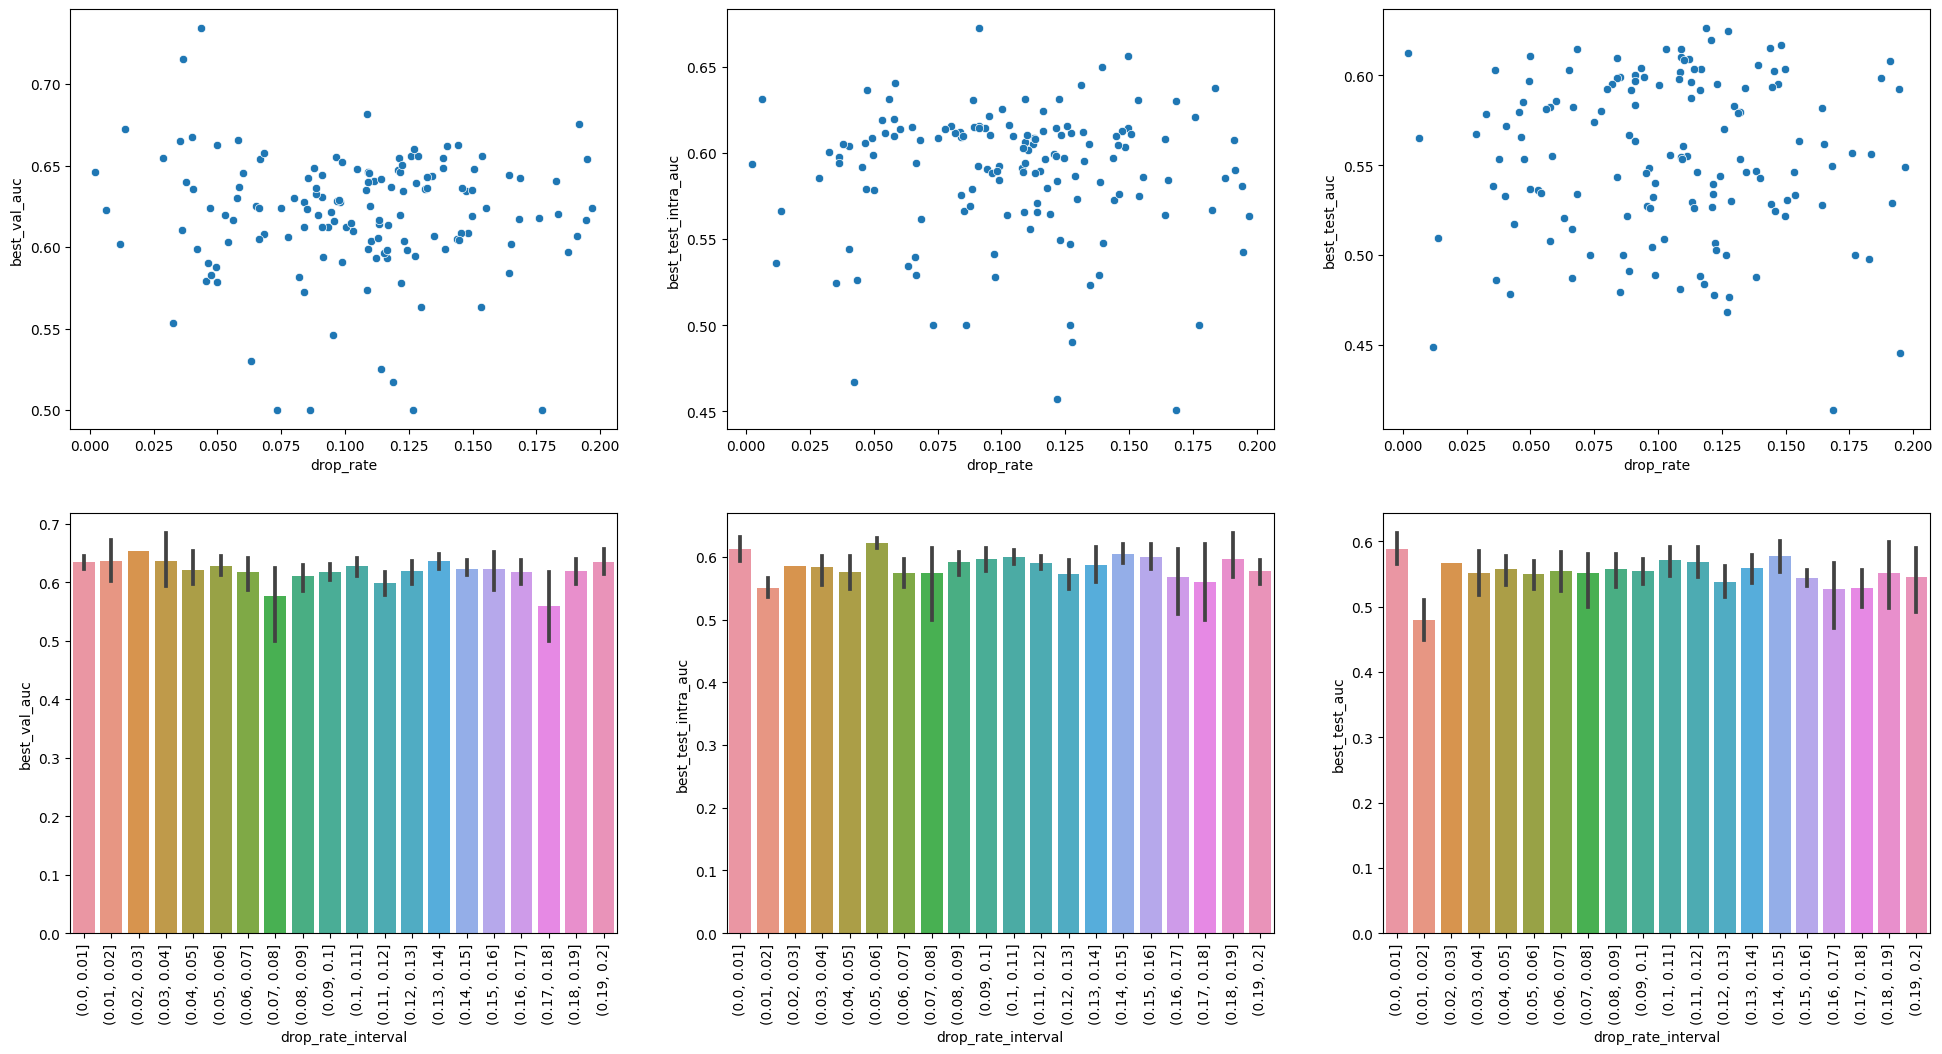

In [59]:
graphs_intra(bdd_schiz, 'drop_rate', continuous=True,
             min_param=0, max_param=0.2)

### Sigma noise

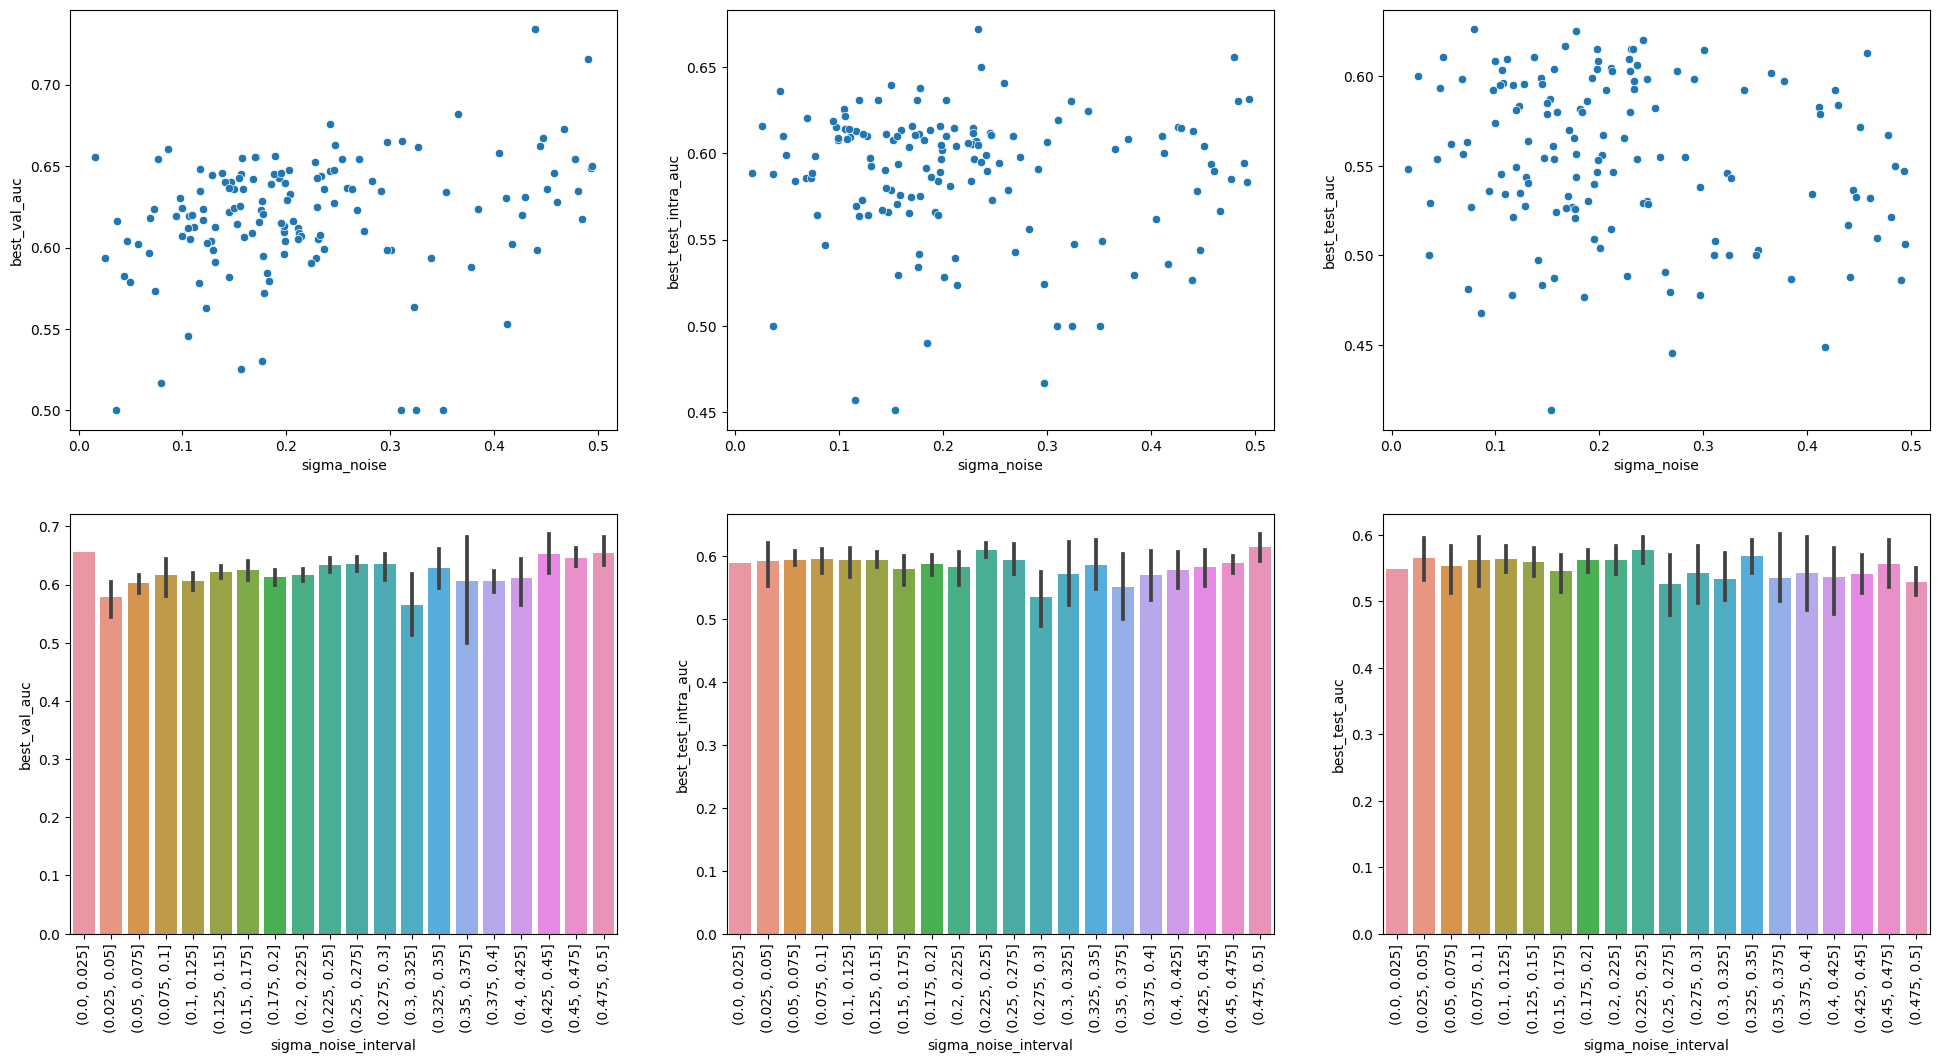

In [60]:
graphs_intra(bdd_schiz, 'sigma_noise', continuous=True,
             min_param=0, max_param=0.5)

### Learning rate

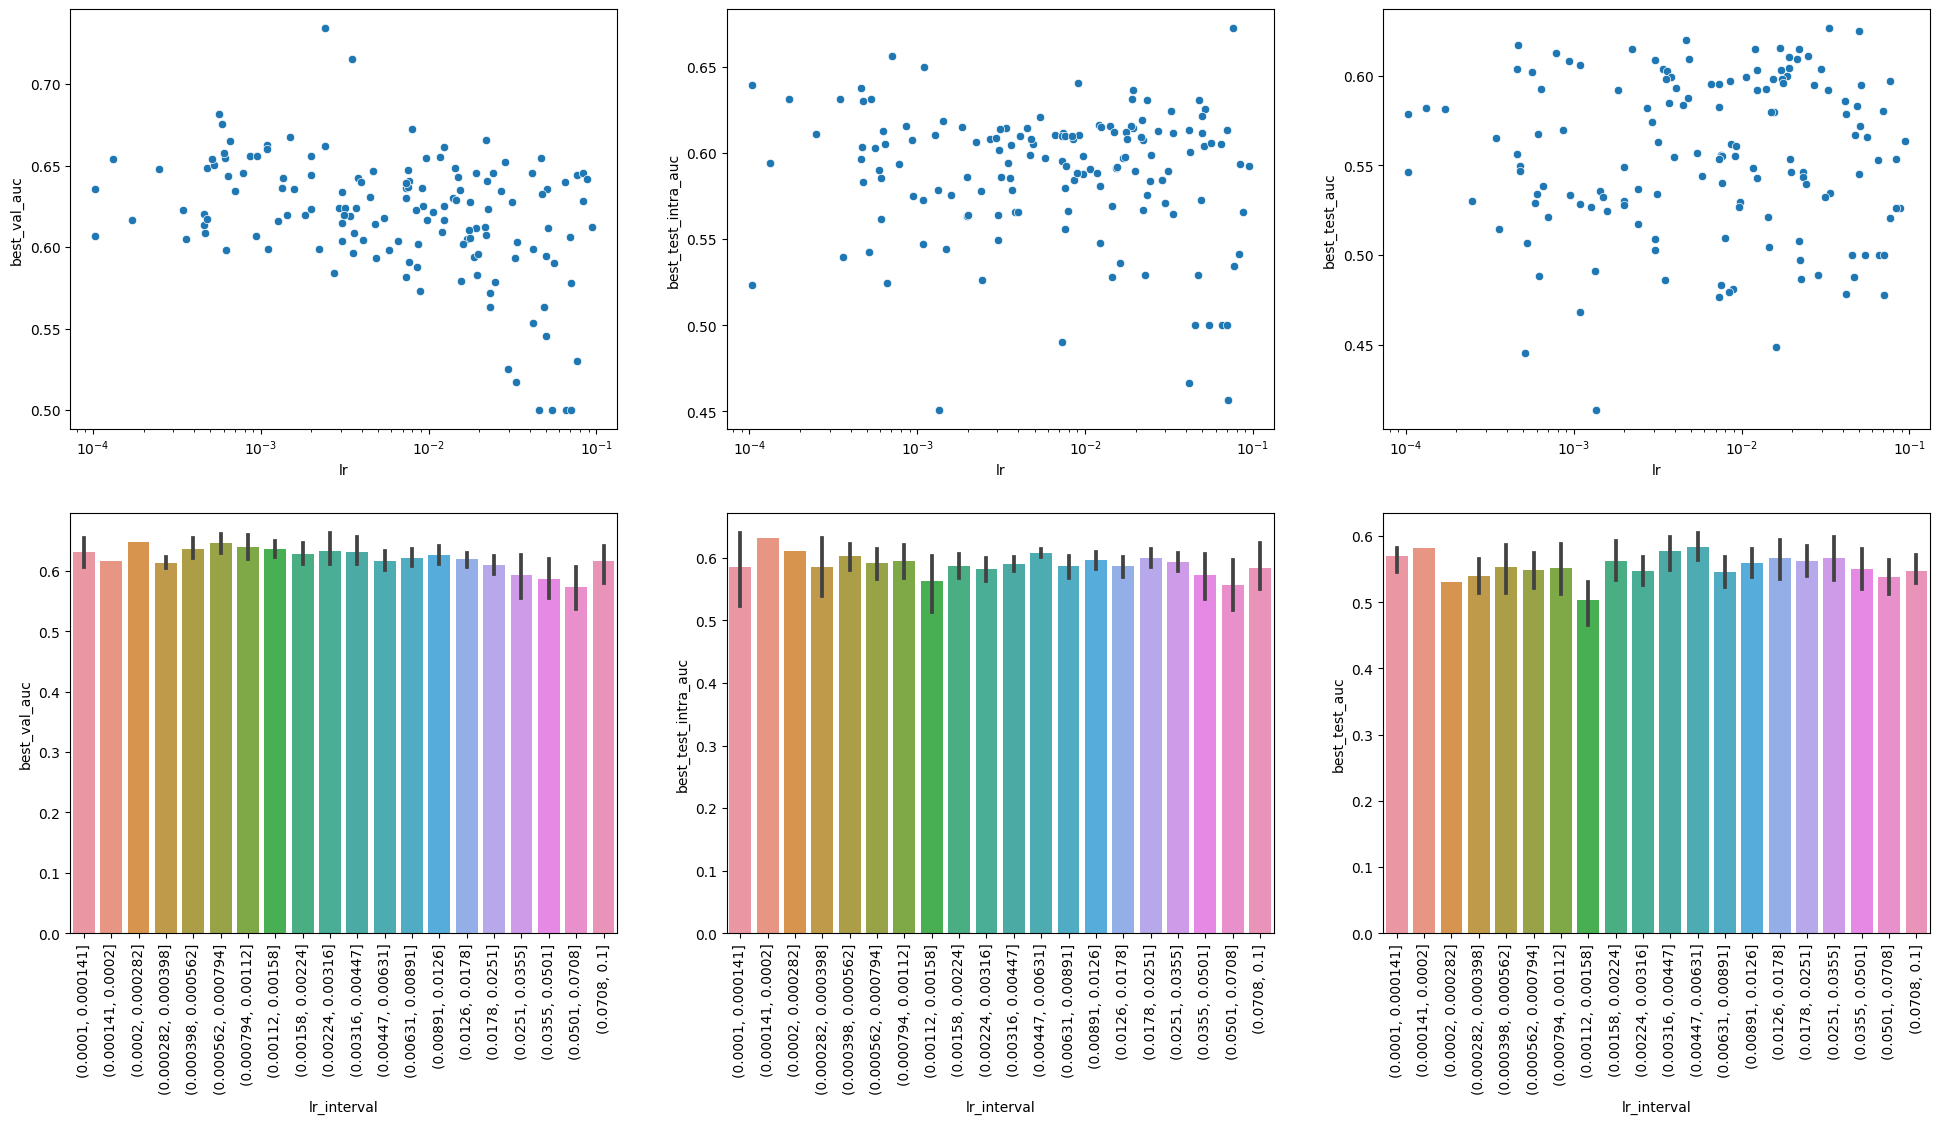

In [73]:
graphs_intra(bdd_schiz, 'lr', continuous=True,
             min_param=-4, max_param=-1, log=True)

### Max angle

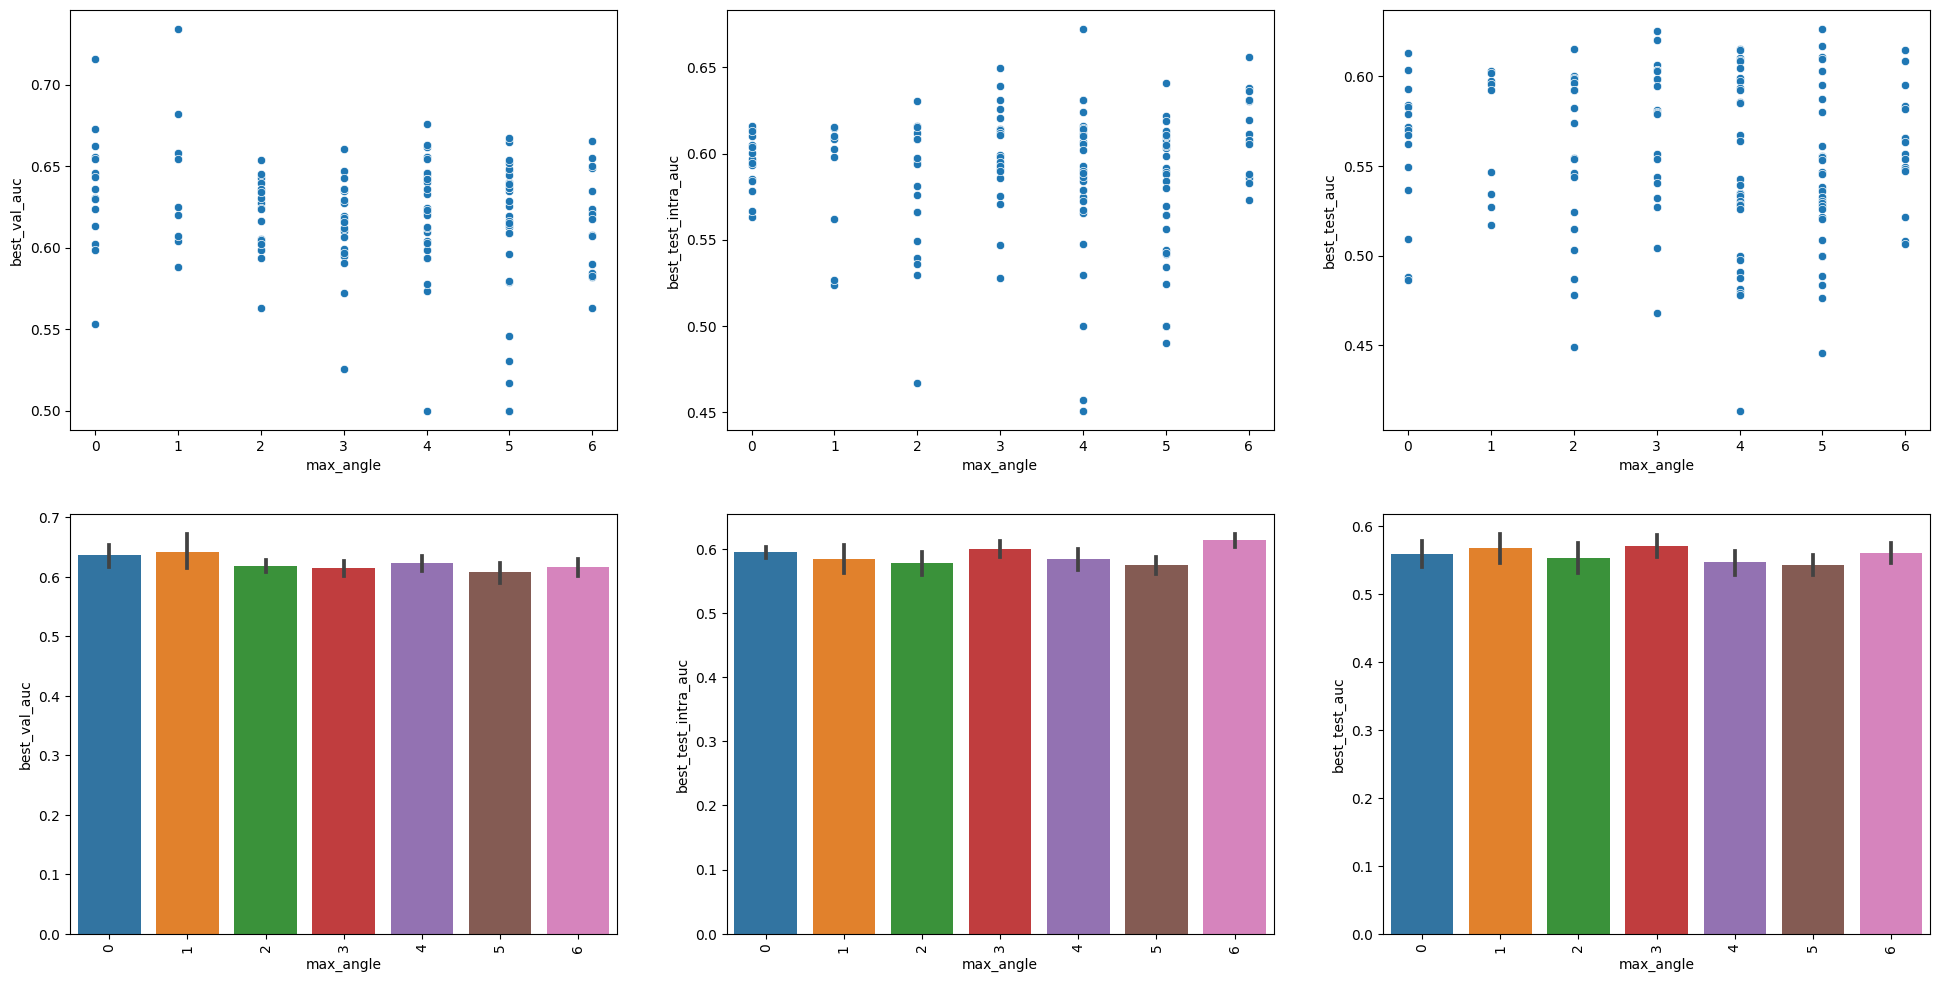

In [74]:
graphs_intra(bdd_schiz, 'max_angle', continuous=False,
             min_param=0, max_param=0.5)

## Structure parameters

### Projection head activation

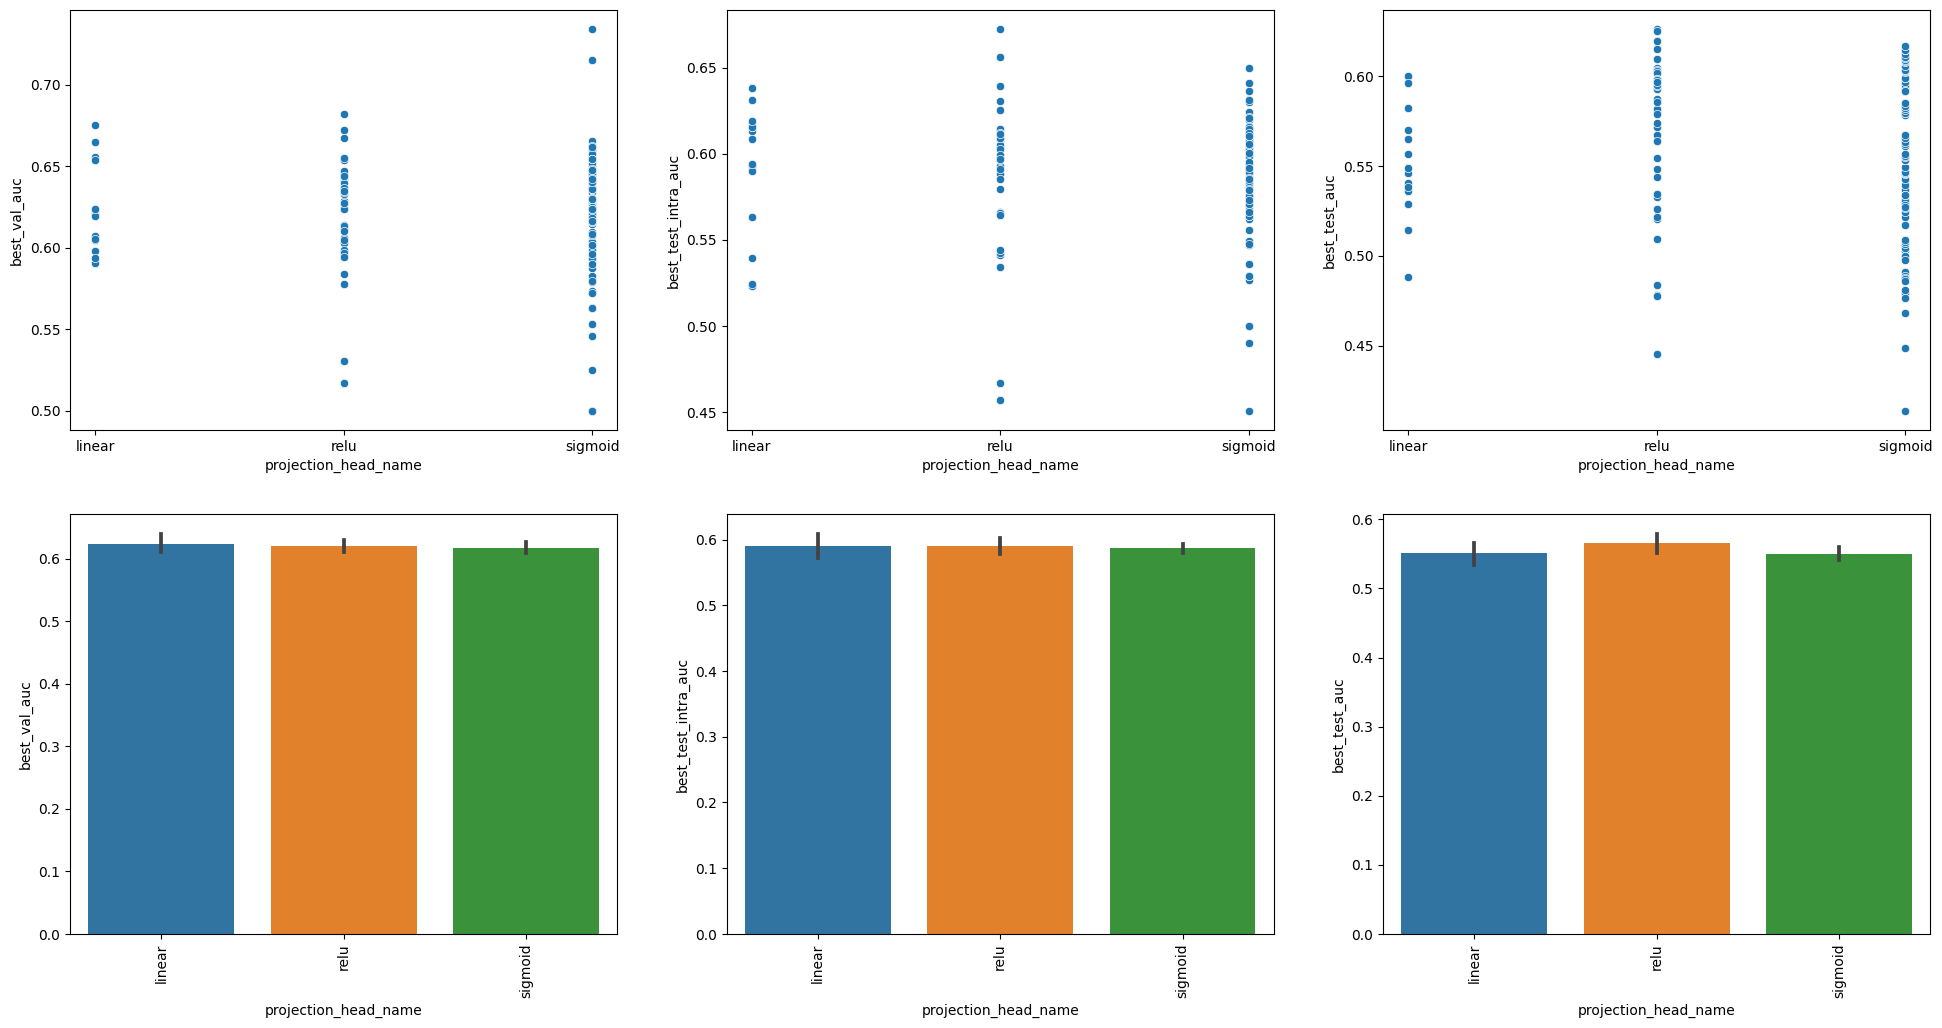

In [79]:
bdd_schiz = bdd_schiz.sort_values(['projection_head_name'])
graphs_intra(bdd_schiz, 'projection_head_name', continuous=False,
             min_param=0, max_param=0.2)

### Converter activation

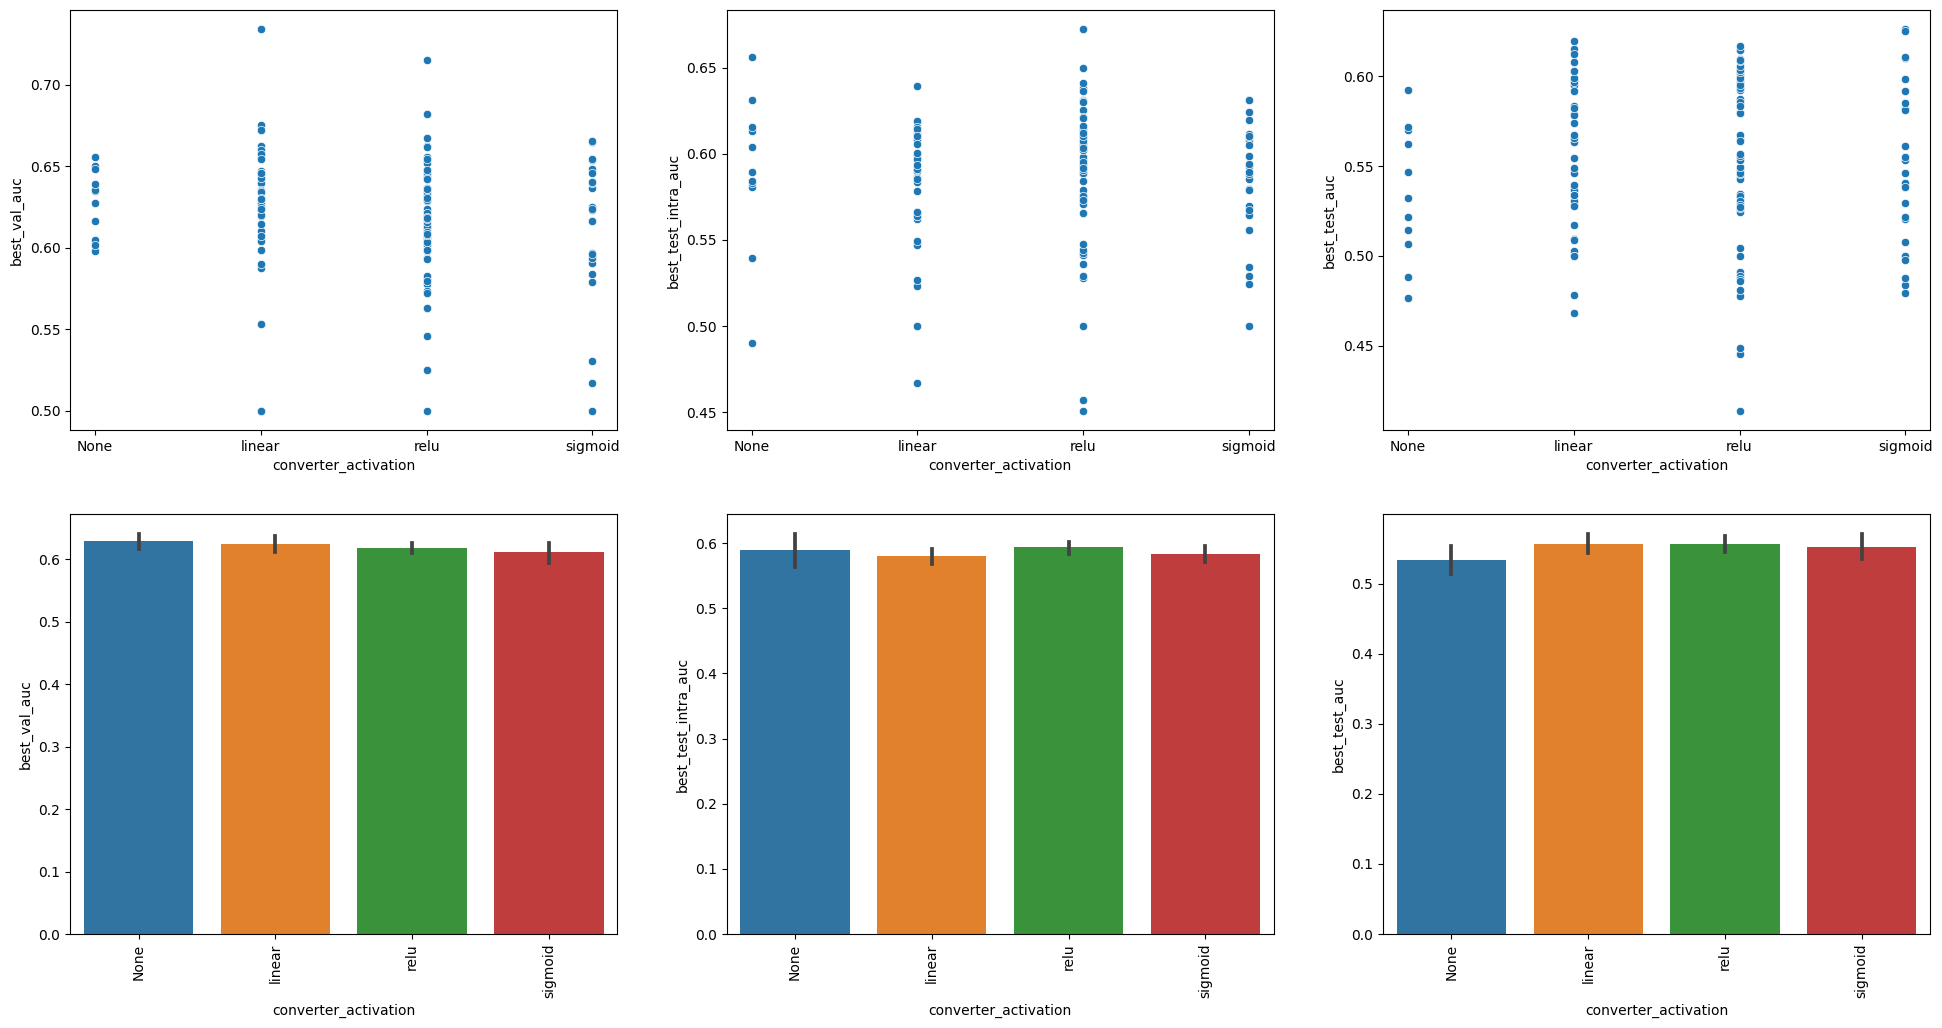

<Axes: xlabel='converter_activation', ylabel='best_test_auc'>

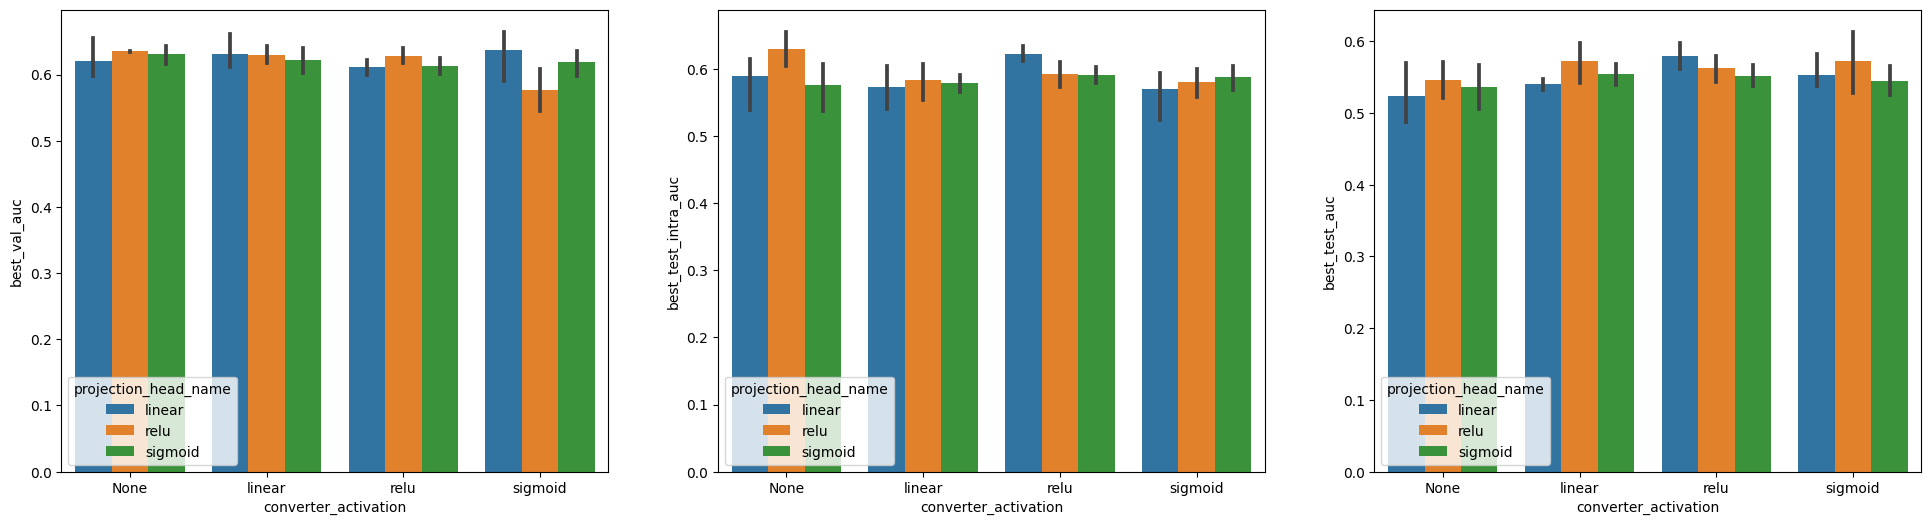

In [80]:
bdd_schiz = bdd_schiz.sort_values(['converter_activation', 'projection_head_name'])
graphs_intra(bdd_schiz, 'converter_activation', continuous=False,
             min_param=0, max_param=0.2)

plt.figure(figsize=(24,6))
plt.subplot(131)
sns.barplot(bdd_schiz, x='converter_activation', y='best_val_auc', hue='projection_head_name')

plt.subplot(132)
sns.barplot(bdd_schiz, x='converter_activation', y='best_test_intra_auc', hue='projection_head_name')

plt.subplot(133)
sns.barplot(bdd_schiz, x='converter_activation', y='best_test_auc', hue='projection_head_name')

### Backbone output size

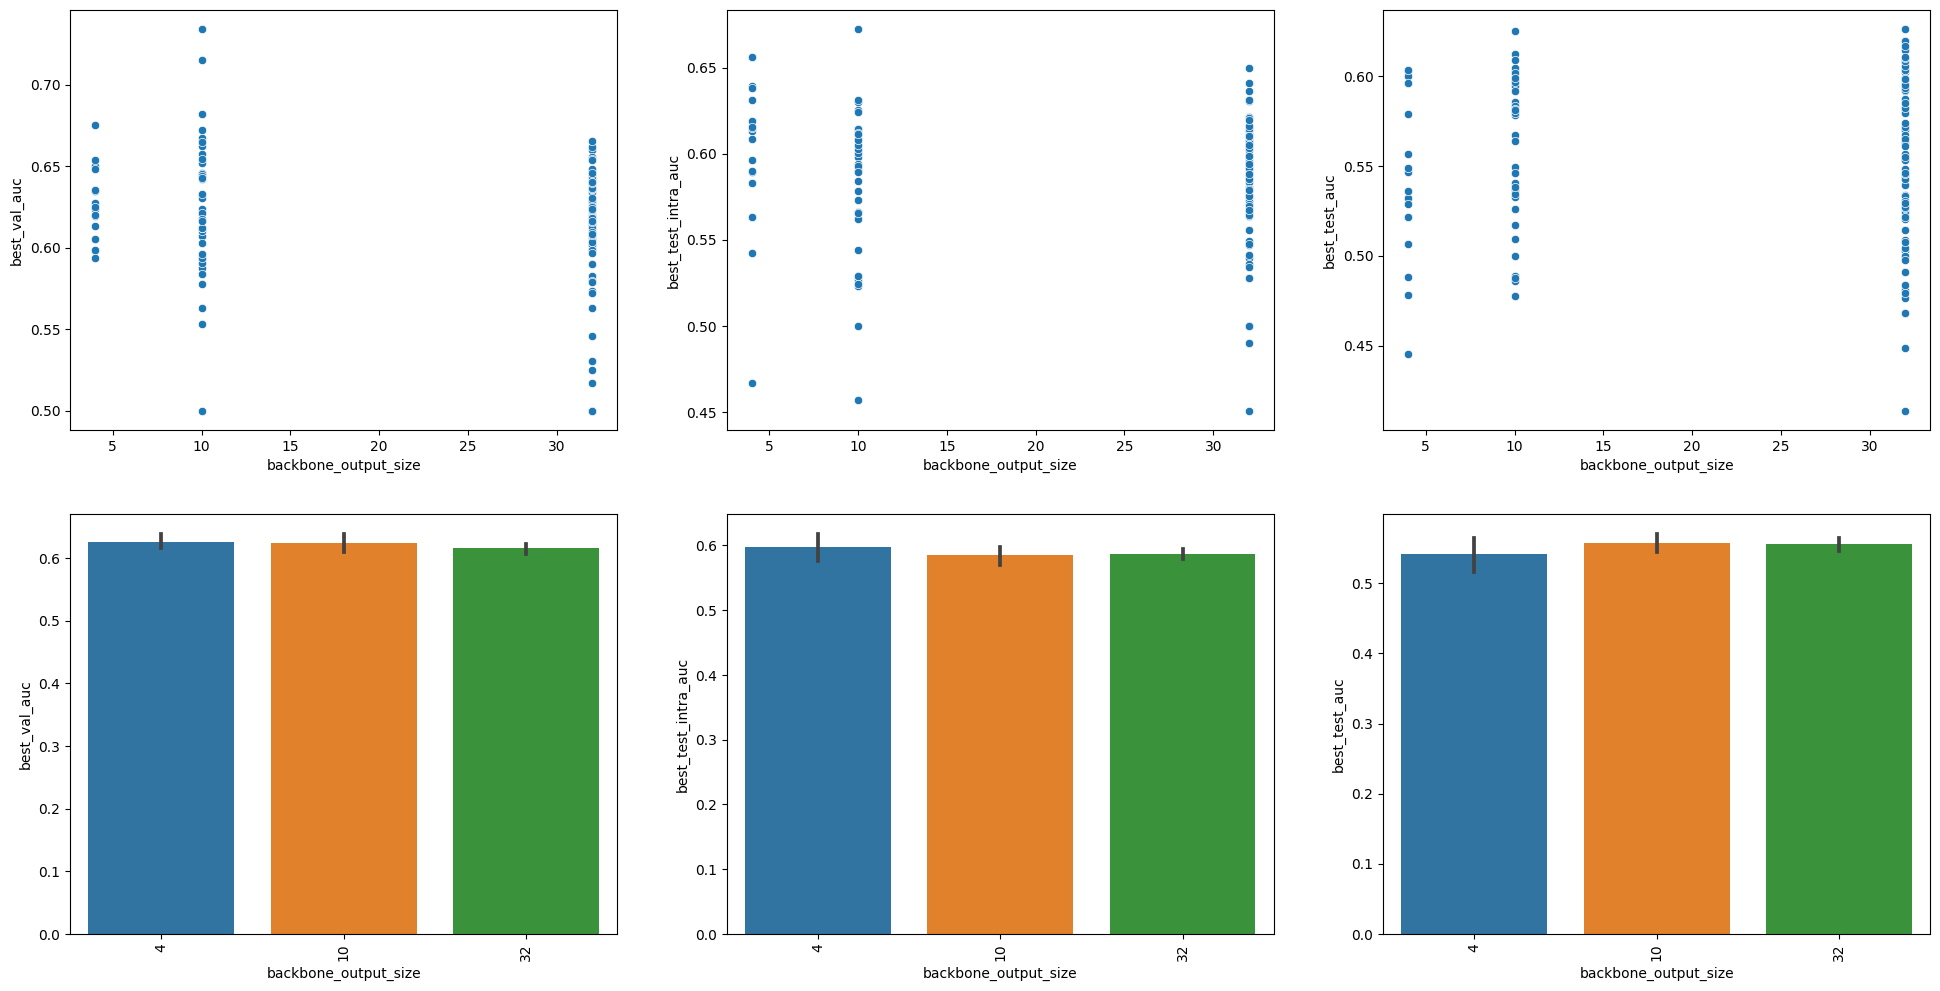

In [81]:
graphs_intra(bdd_schiz, 'backbone_output_size', continuous=False,
             min_param=0, max_param=0.2)

### Fusioned latent space size

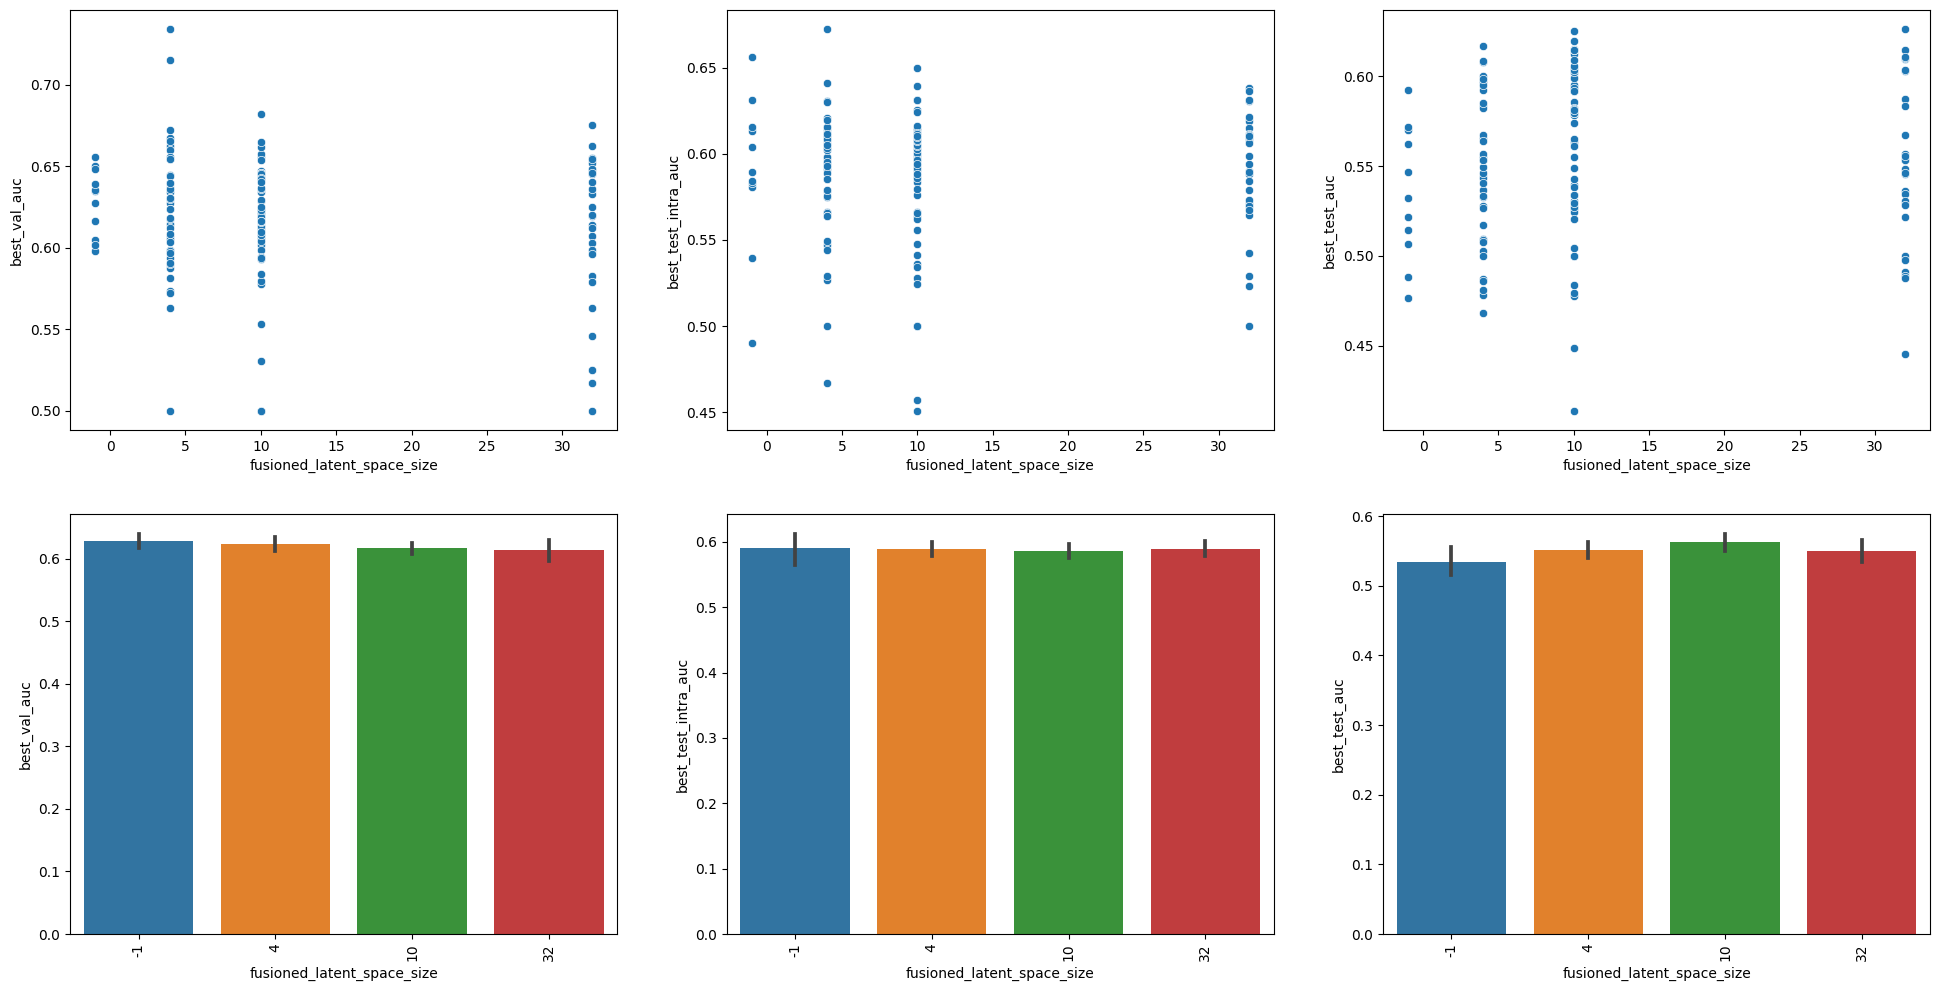

In [82]:
graphs_intra(bdd_schiz, 'fusioned_latent_space_size', continuous=False,
             min_param=0, max_param=0.2)

# Activation further comparison (just more models for some conditions)

In [6]:
bdd_activations = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step1/bdd_activations.csv", index_col=0)
bdd_activations

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.774293,0.649480,0.494111,0.488300,0.725923,0.668191,0.514950,0.565579,0.072939,10,0.000840,6,relu,0.295341,1.268184
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.598395,0.621206,0.588644,0.600369,0.611134,0.621206,0.599064,0.611761,0.099463,10,0.013183,6,relu,0.007683,1.370179
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.903596,0.580042,0.496225,0.531404,0.709408,0.631185,0.509816,0.580049,0.147964,10,0.000381,4,relu,0.189182,1.060053
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.995774,0.567983,0.565690,0.550185,0.688377,0.594595,0.563576,0.619150,0.055323,10,0.000229,3,relu,0.038142,0.927314
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.608111,0.610811,0.600423,0.624384,0.529234,0.632432,0.540622,0.418719,0.100606,10,0.018595,6,relu,0.015524,1.355021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.903598,0.541996,0.525445,0.562192,0.698885,0.670270,0.514044,0.568658,0.054652,-1,0.001431,0,sigmoid,0.062278,0.974331
23,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.663487,0.563825,0.622471,0.632389,0.614145,0.610811,0.606614,0.609298,0.062589,-1,0.002203,0,sigmoid,0.003262,1.305248
24,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.479412,0.543451,0.427061,0.441195,0.603629,0.602911,0.606841,0.622845,0.093933,-1,0.011720,0,sigmoid,0.043766,1.364846
25,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.874530,0.613721,0.540169,0.519397,0.723431,0.631185,0.551042,0.504618,0.068390,-1,0.004813,0,sigmoid,0.076198,1.007713


In [8]:
relu_relu = bdd_activations[bdd_activations.projection_head_name == 'relu']
relu_relu

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss,drop_rate_interval
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.774293,0.649480,0.494111,0.488300,0.725923,0.668191,0.514950,0.565579,0.072939,10,0.000840,6,relu,0.295341,1.268184,"(0.07, 0.08]"
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.598395,0.621206,0.588644,0.600369,0.611134,0.621206,0.599064,0.611761,0.099463,10,0.013183,6,relu,0.007683,1.370179,"(0.09, 0.1]"
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.903596,0.580042,0.496225,0.531404,0.709408,0.631185,0.509816,0.580049,0.147964,10,0.000381,4,relu,0.189182,1.060053,"(0.14, 0.15]"
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.995774,0.567983,0.565690,0.550185,0.688377,0.594595,0.563576,0.619150,0.055323,10,0.000229,3,relu,0.038142,0.927314,"(0.05, 0.06]"
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.608111,0.610811,0.600423,0.624384,0.529234,0.632432,0.540622,0.418719,0.100606,10,0.018595,6,relu,0.015524,1.355021,"(0.1, 0.11]"
5,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.699306,0.612474,0.516762,0.560037,0.719701,0.662786,0.563576,0.618842,0.074697,10,0.001234,6,relu,0.260366,1.279598,"(0.07, 0.08]"
6,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.607048,0.595842,0.604047,0.614840,0.607309,0.644906,0.590909,0.599138,0.048827,10,0.029429,6,relu,0.256758,1.338148,"(0.04, 0.05]"
7,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.602571,0.595842,0.626397,0.593596,0.601122,0.608732,0.591664,0.599754,0.112097,10,0.020786,6,relu,0.284872,1.342063,"(0.11, 0.12]"
8,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.639545,0.614553,0.504983,0.612685,0.631897,0.665696,0.551948,0.602525,0.102229,10,0.001890,6,relu,0.275675,1.333295,"(0.1, 0.11]"
9,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.676786,0.659459,0.540169,0.626847,0.658155,0.662786,0.529447,0.618842,0.055359,10,0.001224,6,relu,0.310296,1.307623,"(0.05, 0.06]"


In [10]:
none_sigmoid = bdd_activations[bdd_activations.projection_head_name == 'sigmoid']
none_sigmoid

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss,drop_rate_interval
13,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.625620,0.565904,0.562972,0.652094,0.602980,0.619958,0.631154,0.590209,0.065704,-1,0.002719,0,sigmoid,0.037986,1.346405,"(0.06, 0.07]"
14,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.971576,0.556341,0.573241,0.591441,0.649106,0.650728,0.588040,0.592057,0.071718,-1,0.000222,1,sigmoid,0.291156,0.894474,"(0.07, 0.08]"
15,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.939547,0.505405,0.511477,0.524631,0.652656,0.631601,0.574902,0.602217,0.046197,-1,0.000286,2,sigmoid,0.406692,1.043118,"(0.04, 0.05]"
16,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.605892,0.477131,0.500755,0.568504,0.575225,0.590644,0.587813,0.574969,0.042591,-1,0.005777,2,sigmoid,0.019512,1.333641,"(0.04, 0.05]"
17,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.580740,0.511227,0.552779,0.634083,0.556991,0.695218,0.515403,0.606527,0.161732,-1,0.015171,2,sigmoid,0.432761,1.348774,"(0.16, 0.17]"
18,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.631940,0.549272,0.528692,0.610837,0.603849,0.612058,0.614089,0.598830,0.074115,-1,0.002043,0,sigmoid,0.067689,1.335534,"(0.07, 0.08]"
19,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.452863,0.496466,0.531863,0.434267,0.602182,0.602911,0.573845,0.605296,0.028392,-1,0.004998,0,sigmoid,0.005832,1.355917,"(0.02, 0.03]"
20,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.603027,0.614969,0.583056,0.607913,0.586292,0.634511,0.478858,0.514163,0.095888,-1,0.004190,0,sigmoid,0.010030,1.338901,"(0.09, 0.1]"
21,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.814248,0.508108,0.591060,0.570967,0.644403,0.623285,0.610692,0.611761,0.062276,-1,0.001199,0,sigmoid,0.018707,1.190995,"(0.06, 0.07]"
22,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.903598,0.541996,0.525445,0.562192,0.698885,0.670270,0.514044,0.568658,0.054652,-1,0.001431,0,sigmoid,0.062278,0.974331,"(0.05, 0.06]"


<Axes: xlabel='projection_head_name', ylabel='best_test_auc'>

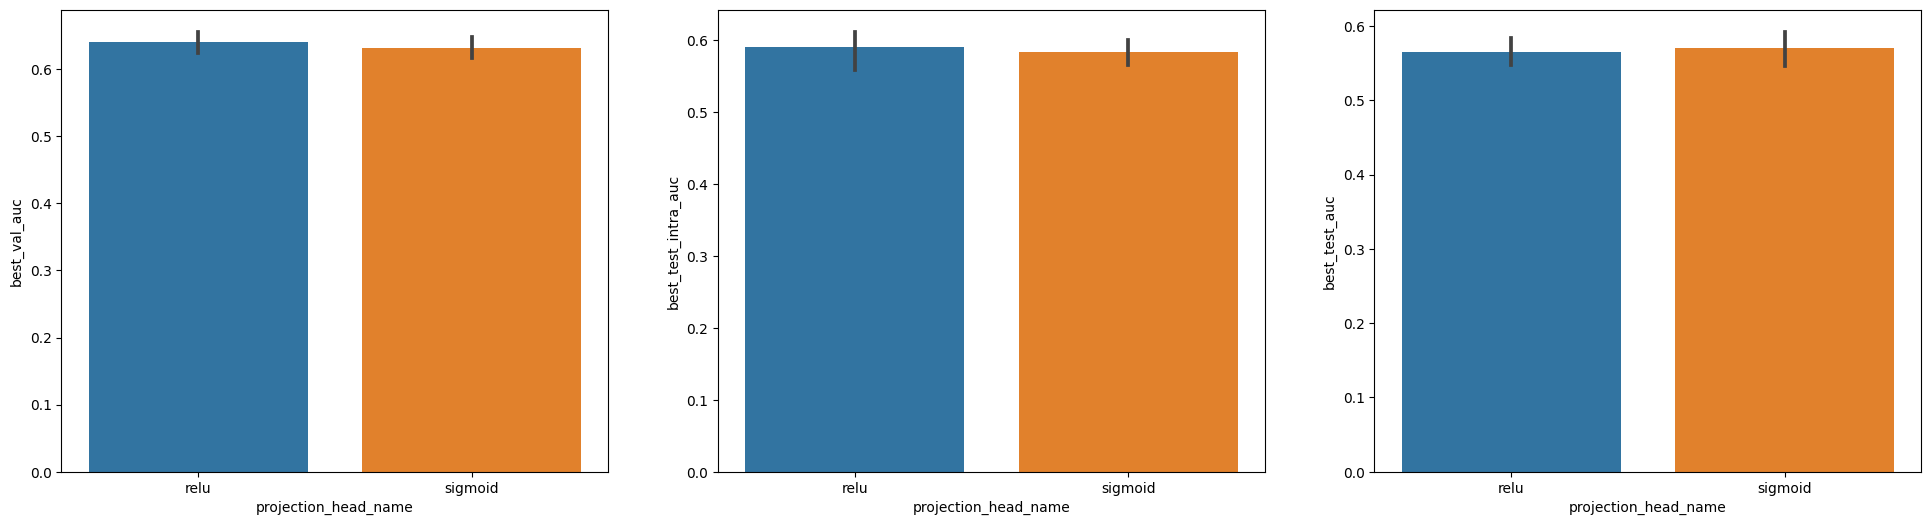

In [14]:
plt.figure(figsize=(24,6))

plt.subplot(131)
sns.barplot(bdd_activations, y='best_val_auc', x='projection_head_name')

plt.subplot(132)
sns.barplot(bdd_activations, y='best_test_intra_auc', x='projection_head_name')

plt.subplot(133)
sns.barplot(bdd_activations, y='best_test_auc', x='projection_head_name')